<a href="https://colab.research.google.com/github/jcasemiro/projeto_final/blob/main/Projeto_Final_%5BAED%5D_Joao_Casemiro_de_Oliveira_Neto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

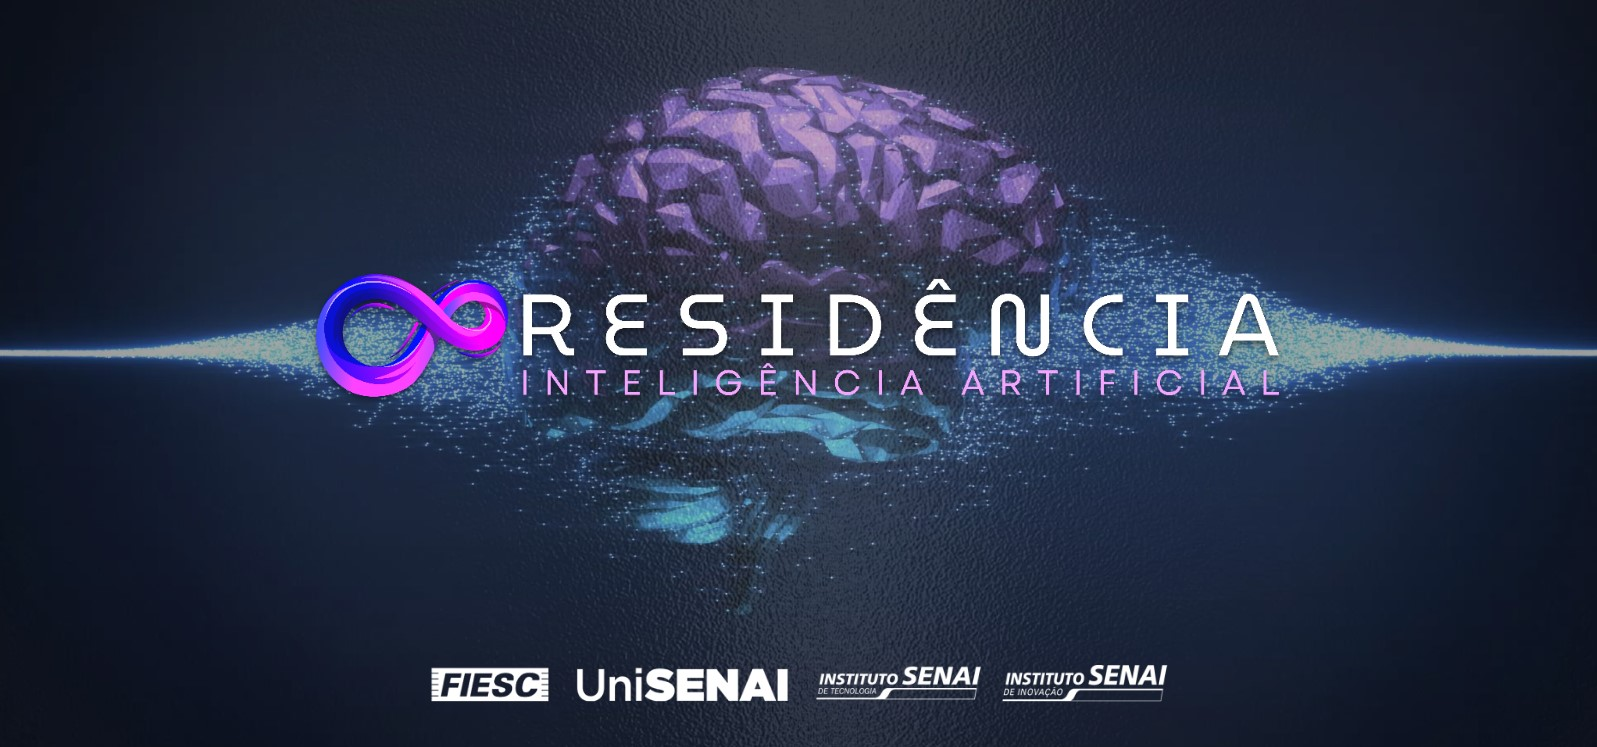

                               ♾️ Bootcamp Ciência de Dados e Inteligência Artificial ♾️
                                  
                                                        PROJETO FINAL
                                  
Aluno: João Casemiro de Oliveira Neto.

Desenvolvimento dos códigos e rotinas para a análise exploratória, tratamento, visualização e apresentação do conjunto de dados disponibilizados proveniente da empresa:

# 🏭 SIDERÚRGICA CDIA 🏭

In [3]:
# Iniciando importando bibliotecas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Executando o upload dos dados disponibilizados para análise [bootcamp_train.csv], diretamente do Github:

url = 'https://raw.githubusercontent.com/jcasemiro/projeto_final/refs/heads/main/bootcamp_train.csv'

dados_def = pd.read_csv(url)

# O objetivo então, é explorar a estrutura destes dados. Então:

dados_def.head()

id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0   0       154     169.0    260124    260136            100           75   
1   1      1121    -186.0   1789332   1789337            100         -206   
2   2        41     216.0   2708878   2708939            100         6298   
3   3       129     157.0     86408     86427            100          276   
4   4       436     442.0   4959398    530985            100           63   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...  \
0           27           17                9948.0  ...   
1            9         -194                2240.0  ...   
2          275          134              654634.0  ...   
3           39           26               33858.0  ...   
4           17           17                6374.0  ...   

   indice_de_luminosidade  sigmoide_das_areas minimo_da_luminosidade falha_1  \
0                  0.0362              0.3068                    125   False   
1                  0.0294              0.1441                    115   False   
2                 -0.1879              1.0000                     42   False   
3                 -0.0416              0.8223                    115   False   
4                 -0.2096              0.2083                     90   False   

   falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros  
0        0    False    False      não    False           Sim  
1    False    False     True      Não    False           Não  
2    False     True    False      não    False           Não  
3    False     True    False      não    False           Não  
4     True    False    False      Não    False           Não  

[5 rows x 39 columns]

In [5]:
dados_def.tail()

id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  \
3385  3385       779     802.0    402237    402266            100   
3386  3386        41     188.0    327823    327870            100   
3387  3387       823     834.0    323844    323852            100   
3388  3388      9505    -186.0    949856    949874            100   
3389  3389      1181    1191.0   1146871   1146879            100   

      area_pixels  perimetro_x  perimetro_y  soma_da_luminosidade  ...  \
3385          755          177           17                 764.0  ...   
3386         3437          248          116              354240.0  ...   
3387          135           20         -194               14169.0  ...   
3388         -206           29           26                   NaN  ...   
3389           12            5            5                1585.0  ...   

      indice_de_luminosidade  sigmoide_das_areas minimo_da_luminosidade  \
3385                 -0.1026              1.0000                    103   
3386                 -0.1749              1.0000                     42   
3387                 -0.1264              0.3977                     97   
3388                 -0.0238              0.8355                    116   
3389                 -0.0022              0.1400                    120   

     falha_1  falha_2  falha_3  falha_4  falha_5  falha_6  falha_outros  
3385   False    False    False    False      não     True           Não  
3386       0    False    False    False      não    False           Sim  
3387   False    False    False    False      Não     True           Não  
3388   False        0    False    False      Não    False           Sim  
3389   False    False    False    False      Não    False           Sim  

[5 rows x 39 columns]

In [6]:
# Conforme indicado, observa-se um dataset contendo 3390 registros divididos em 39 classes com aspectos relacionados aos defeitos observados.
# Lendo as labels e identificando suas colunas para entender melhor:

print(dados_def.columns)

Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço',
       'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado',
       'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y',
       'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo',
       'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4',
       'falha_5', 'falha_6', 'falha_outros'],
      dtype='object')


In [7]:
dados_def.shape

(3390, 39)

In [8]:
dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [9]:
# Desta maneira, observa-se 4 tipos de classificação: inteiros, floats, objects e bools, além da presença de números nulos.
# Investingando NaN

dados_def.isnull().sum()

id                                0
x_minimo                          0
x_maximo                         56
y_minimo                          0
y_maximo                          0
peso_da_placa                     0
area_pixels                       0
perimetro_x                       0
perimetro_y                       0
soma_da_luminosidade            100
maximo_da_luminosidade           98
comprimento_do_transportador      0
tipo_do_aço_A300                  0
tipo_do_aço_A400                 76
espessura_da_chapa_de_aço        41
temperatura                       0
index_de_bordas                   0
index_vazio                       0
index_quadrado                   36
index_externo_x                   0
indice_de_bordas_x                0
indice_de_bordas_y                0
indice_de_variacao_x              0
indice_de_variacao_y              0
indice_global_externo            59
log_das_areas                     0
log_indice_x                      0
log_indice_y                      0
indice_de_orientaçao              0
indice_de_luminosidade           50
sigmoide_das_areas                0
minimo_da_luminosidade            0
falha_1                           0
falha_2                           0
falha_3                           0
falha_4                           0
falha_5                           0
falha_6                           0
falha_outros                      0
dtype: int64

In [10]:
# Antes de tomar atitudes com relação aos dados faltantes, irei observar os dados de classes bool e object, portanto:

print(f"Aço A300: {dados_def['tipo_do_aço_A300'].unique()}")
print(f"Aço A400: {dados_def['tipo_do_aço_A400'].unique()}")
print(f"Falha 1: {dados_def['falha_1'].unique()}")
print(f"Falha 2: {dados_def['falha_2'].unique()}")
print(f"Falha 3: {dados_def['falha_3'].unique()}")
print(f"Falha 4: {dados_def['falha_4'].unique()}")
print(f"Falha 5: {dados_def['falha_5'].unique()}")
print(f"Falha 6: {dados_def['falha_6'].unique()}")
print(f"Falha Outros: {dados_def['falha_outros'].unique()}")

Aço A300: ['Não' 'não' '1' 'Sim' 'sim' '0' 'N' '-']
Aço A400: ['sim' 'Sim' 'Não' 'não' nan '1' '0' 'S' 'nao']
Falha 1: ['False' '0' '1' 'True' 'nao' 'S']
Falha 2: ['0' 'False' 'True' 'y' '1' 'S']
Falha 3: [False  True]
Falha 4: ['False' 'True' 'nao' '0' 'S' '1']
Falha 5: ['não' 'Não' 'Sim' 'sim']
Falha 6: [False  True]
Falha Outros: ['Sim' 'Não']


In [11]:
# Nota-se que são classes puramente booleanas. Para facilidade do seu tratamento e análise, padronizarei todas em 'True' ou 'False':
# Mas antes, quero investigar o '-' no Aço 300.

count = dados_def['tipo_do_aço_A300'].value_counts()['-']
print(f"O string '-' aparece {count} vezes.")

O string '-' aparece 6 vezes.


In [12]:
# Portanto, nota-se que estes registros não são relevantes para o tamanho da amostra. Serão substituidos pela moda.
# Começando então com a padronização das classes booleanas:
# 'tipo_do_aço_A300':

dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('Não', False)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('não', False)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('N', False)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('0', False)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('Sim', True)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('sim', True)
dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('1', True)

print(f"Aço A300: {dados_def['tipo_do_aço_A300'].unique()}")
count_f = dados_def['tipo_do_aço_A300'].value_counts()[False]
print(f"False aparece {count_f} vezes.")
count_t = dados_def['tipo_do_aço_A300'].value_counts()[True]
print(f"True aparece {count_t} vezes.")

print(f"A coluna está com {count_t+count_f} dados.")

Aço A300: [False True '-']
False aparece 2018 vezes.
True aparece 1366 vezes.
A coluna está com 3384 dados.


In [13]:
# Portanto, substituindo pela moda:

dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('-', False)

print(f"Aço A300: {dados_def['tipo_do_aço_A300'].unique()}")
count_f = dados_def['tipo_do_aço_A300'].value_counts()[False]
count_t = dados_def['tipo_do_aço_A300'].value_counts()[True]
print(f"A coluna está com {count_t+count_f} dados.")

Aço A300: [False  True]
A coluna está com 3390 dados.


<ipython-input-13-7e2284a80d49>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_def['tipo_do_aço_A300'] = dados_def['tipo_do_aço_A300'].replace('-', False)


In [14]:
# Como preciso apenas de uma coluna relacionando o tipo de aço (quanto for Aço A300, não sera A400), desprezarei esta coluna:

dados_def.drop(columns=['tipo_do_aço_A400'], axis=1, inplace=True)

In [15]:
# Portanto:

dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   bool   
 13  esp

In [16]:
#Dando sequência:

print(f"Falha 1: {dados_def['falha_1'].unique()}")
print(f"{len(dados_def['falha_1'])} registros.")

Falha 1: ['False' '0' '1' 'True' 'nao' 'S']
3390 registros.


In [17]:
# Como não há dados faltantes:

dados_def['falha_1'] = dados_def['falha_1'].replace('False', False)
dados_def['falha_1'] = dados_def['falha_1'].replace('0', False)
dados_def['falha_1'] = dados_def['falha_1'].replace('nao', False)
dados_def['falha_1'] = dados_def['falha_1'].replace('1', True)
dados_def['falha_1'] = dados_def['falha_1'].replace('True', True)
dados_def['falha_1'] = dados_def['falha_1'].replace('S', True)

print(f"Falha 1: {dados_def['falha_1'].unique()}")

Falha 1: [False  True]


<ipython-input-17-d7db9163e1d8>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_def['falha_1'] = dados_def['falha_1'].replace('S', True)


In [18]:
#Seguindo:

print(f"Falha 2: {dados_def['falha_2'].unique()}")
print(f"{len(dados_def['falha_2'])} registros.")

Falha 2: ['0' 'False' 'True' 'y' '1' 'S']
3390 registros.


In [19]:
# Como não há dados faltantes:

dados_def['falha_2'] = dados_def['falha_2'].replace('0', False)
dados_def['falha_2'] = dados_def['falha_2'].replace('False', False)
dados_def['falha_2'] = dados_def['falha_2'].replace('True', True)
dados_def['falha_2'] = dados_def['falha_2'].replace('y', True)
dados_def['falha_2'] = dados_def['falha_2'].replace('1', True)
dados_def['falha_2'] = dados_def['falha_2'].replace('S', True)

print(f"Falha 2: {dados_def['falha_2'].unique()}")

Falha 2: [False  True]


<ipython-input-19-095fb2ddf89b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_def['falha_2'] = dados_def['falha_2'].replace('S', True)


In [20]:
#Seguindo:

print(f"Falha 3: {dados_def['falha_3'].unique()}")
print(f"{len(dados_def['falha_3'])} registros.")

Falha 3: [False  True]
3390 registros.


In [21]:
# A Falha 3 já está descrita corretamente, seguindo:

print(f"Falha 4: {dados_def['falha_4'].unique()}")
print(f"{len(dados_def['falha_4'])} registros.")

Falha 4: ['False' 'True' 'nao' '0' 'S' '1']
3390 registros.


In [22]:
# Como não há dados faltantes:

dados_def['falha_4'] = dados_def['falha_4'].replace('False', False)
dados_def['falha_4'] = dados_def['falha_4'].replace('nao', False)
dados_def['falha_4'] = dados_def['falha_4'].replace('0', False)
dados_def['falha_4'] = dados_def['falha_4'].replace('True', True)
dados_def['falha_4'] = dados_def['falha_4'].replace('S', True)
dados_def['falha_4'] = dados_def['falha_4'].replace('1', True)

print(f"Falha 4: {dados_def['falha_4'].unique()}")

Falha 4: [False  True]


<ipython-input-22-818dea59f1b0>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_def['falha_4'] = dados_def['falha_4'].replace('1', True)


In [23]:
# Para a Falha 5:

print(f"Falha 5: {dados_def['falha_5'].unique()}")
print(f"{len(dados_def['falha_5'])} registros.")

Falha 5: ['não' 'Não' 'Sim' 'sim']
3390 registros.


In [24]:
# Sem dados faltantes também:

dados_def['falha_5'] = dados_def['falha_5'].replace('não', False)
dados_def['falha_5'] = dados_def['falha_5'].replace('Não', False)
dados_def['falha_5'] = dados_def['falha_5'].replace('Sim', True)
dados_def['falha_5'] = dados_def['falha_5'].replace('sim', True)

print(f"Falha 5: {dados_def['falha_5'].unique()}")

Falha 5: [False  True]


<ipython-input-24-06bc86add388>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_def['falha_5'] = dados_def['falha_5'].replace('sim', True)


In [25]:
# Para a Falha 6:

print(f"Falha 6: {dados_def['falha_6'].unique()}")
print(f"{len(dados_def['falha_6'])} registros.")

Falha 6: [False  True]
3390 registros.


In [26]:
# Também está certamente descrita, e por fim:
# Para os outros tipos de falhas:

print(f"Outras Falhas: {dados_def['falha_outros'].unique()}")
print(f"{len(dados_def['falha_outros'])} registros.")

Outras Falhas: ['Sim' 'Não']
3390 registros.


In [27]:
# Sem dados faltantes também:

dados_def['falha_outros'] = dados_def['falha_5'].replace('Sim', True)
dados_def['falha_outros'] = dados_def['falha_5'].replace('Não', False)

print(f"Outras Falhas: {dados_def['falha_outros'].unique()}")

Outras Falhas: [False  True]


In [28]:
# Observando agora as classes já tratadas:

dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   bool   
 13  esp

In [29]:
# Partindo para o tratamento subsequente, o peso da placa é sempre o mesmo.
# Não havendo necessidade de se manter.

dados_def.drop(columns=['peso_da_placa'], axis=1, inplace=True)
dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   area_pixels                   3390 non-null   int64  
 6   perimetro_x                   3390 non-null   int64  
 7   perimetro_y                   3390 non-null   int64  
 8   soma_da_luminosidade          3290 non-null   float64
 9   maximo_da_luminosidade        3292 non-null   float64
 10  comprimento_do_transportador  3390 non-null   int64  
 11  tipo_do_aço_A300              3390 non-null   bool   
 12  espessura_da_chapa_de_aço     3349 non-null   float64
 13  tem

In [30]:
# Não é de meu interesse inicial trabalhar com os todos os indices de pixels:

dados_def.drop(columns=['index_externo_x'], axis=1, inplace=True)
dados_def.drop(columns=['indice_de_bordas_x'], axis=1, inplace=True)
dados_def.drop(columns=['indice_de_bordas_y'], axis=1, inplace=True)
dados_def.drop(columns=['indice_de_variacao_x'], axis=1, inplace=True)
dados_def.drop(columns=['indice_de_variacao_y'], axis=1, inplace=True)
dados_def.drop(columns=['indice_global_externo'], axis=1, inplace=True)

dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   area_pixels                   3390 non-null   int64  
 6   perimetro_x                   3390 non-null   int64  
 7   perimetro_y                   3390 non-null   int64  
 8   soma_da_luminosidade          3290 non-null   float64
 9   maximo_da_luminosidade        3292 non-null   float64
 10  comprimento_do_transportador  3390 non-null   int64  
 11  tipo_do_aço_A300              3390 non-null   bool   
 12  espessura_da_chapa_de_aço     3349 non-null   float64
 13  tem

In [31]:
# Trabalharei também apenas com um indice de luminosidade:

dados_def.drop(columns=['maximo_da_luminosidade'], axis=1, inplace=True)
dados_def.drop(columns=['indice_de_luminosidade'], axis=1, inplace=True)
dados_def.drop(columns=['soma_da_luminosidade'], axis=1, inplace=True)

dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   area_pixels                   3390 non-null   int64  
 6   perimetro_x                   3390 non-null   int64  
 7   perimetro_y                   3390 non-null   int64  
 8   comprimento_do_transportador  3390 non-null   int64  
 9   tipo_do_aço_A300              3390 non-null   bool   
 10  espessura_da_chapa_de_aço     3349 non-null   float64
 11  temperatura                   3390 non-null   float64
 12  index_de_bordas               3390 non-null   float64
 13  ind

In [32]:
# Os dados estão bem desbalanceados, serão analisado um por vez:

# Começando com o x_minimo [A menor coordenada X da bounding box ao redor de um defeito ou característica na placa de aço.]:

dados_def['x_minimo'].describe()

count     3390.000000
mean       995.507375
std       1796.737709
min        -11.000000
25%         41.000000
50%        614.000000
75%       1187.500000
max      15266.000000
Name: x_minimo, dtype: float64

In [33]:
bins = int(np.sqrt(len(dados_def)))

<Axes: ylabel='Frequency'>

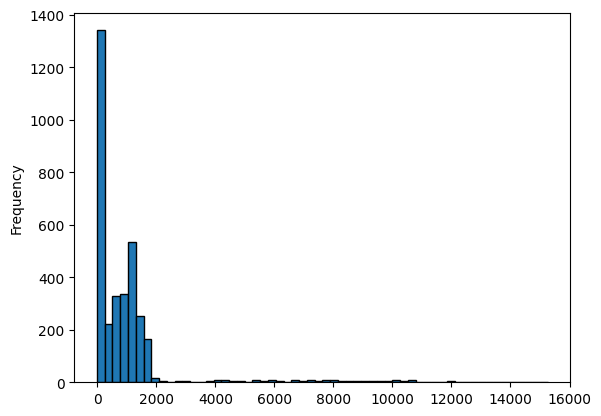

In [34]:
dados_def['x_minimo'].plot(kind='hist', bins=bins, edgecolor='black')

In [35]:
# Nota-se valores bem discrepantes para uma coordenada que deveria ser de mínimos.
# Olhando pelo boxplot:

def plot_boxplots(dados_def, column):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dados_def, x=column)
    plt.title(f'Boxplot de {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

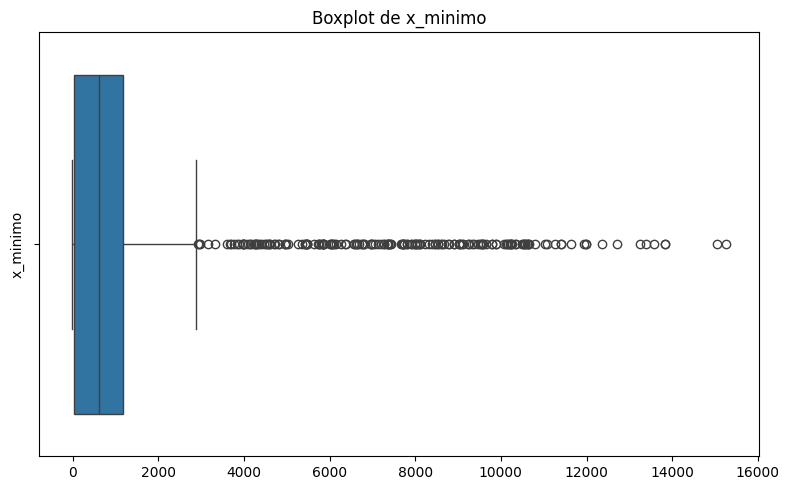

In [36]:
plot_boxplots(dados_def, 'x_minimo')

In [37]:
# Primeiro, atribuindo o valor absoluto para os valores de medidas negativas, pois não há sentido físico:

dados_xmin_negativos = dados_def[dados_def['x_minimo'] < 0]
print(f"{len(dados_xmin_negativos)} registros.")

339 registros.


In [38]:
dados_def['x_minimo'] = list(map(abs, dados_def['x_minimo']))
dados_xmin_negativos_corr = dados_def[dados_def['x_minimo'] < 0]
print(f"{len(dados_xmin_negativos_corr)} registros.")

0 registros.


In [39]:
# Portanto:

dados_def['x_minimo'].describe()

count     3390.000000
mean       997.707375
std       1795.516647
min          0.000000
25%         41.000000
50%        614.000000
75%       1187.500000
max      15266.000000
Name: x_minimo, dtype: float64

In [40]:
# Agora, substituindo os outliers por NaN, e posteriormente pela média corrigida:

Q1_xmin = dados_def['x_minimo'].quantile(0.25)
Q3_xmin = dados_def['x_minimo'].quantile(0.75)
IQR = Q3_xmin - Q1_xmin
limite_inferior = Q1_xmin - 1.5 * IQR
limite_superior = Q3_xmin + 1.5 * IQR

dados_def['x_minimo'] = dados_def['x_minimo'].apply(lambda x: np.nan if x <= limite_inferior or x >= limite_superior else x)
dados_def['x_minimo'].fillna(dados_def['x_minimo'].mean(), inplace=True)

<ipython-input-40-ce37bb82b397>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['x_minimo'].fillna(dados_def['x_minimo'].mean(), inplace=True)


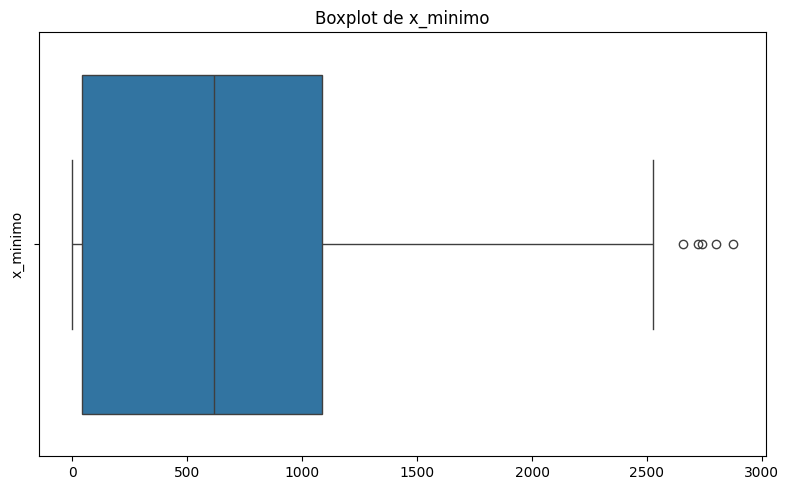

In [41]:
plot_boxplots(dados_def, 'x_minimo')

In [42]:
# Agora o mesmo para os outros dados de medida:

# x_maximo [A maior coordenada X da bounding box ao redor de um defeito ou característica na placa de aço.]:

dados_def['x_maximo'].describe()

count    3334.00000
mean      605.90012
std       548.07724
min      -186.00000
25%       179.00000
50%       544.00000
75%      1090.00000
max      1713.00000
Name: x_maximo, dtype: float64

<Axes: ylabel='Frequency'>

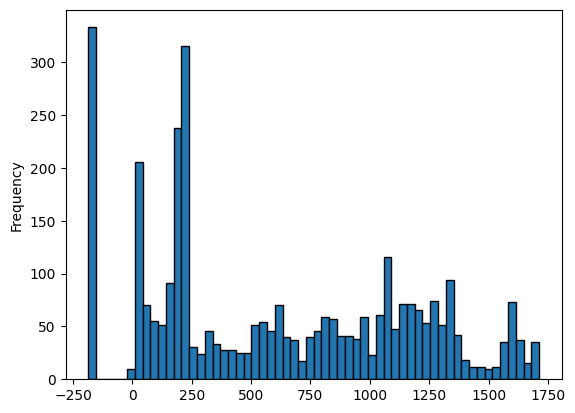

In [43]:
dados_def['x_maximo'].plot(kind='hist', bins=bins, edgecolor='black')

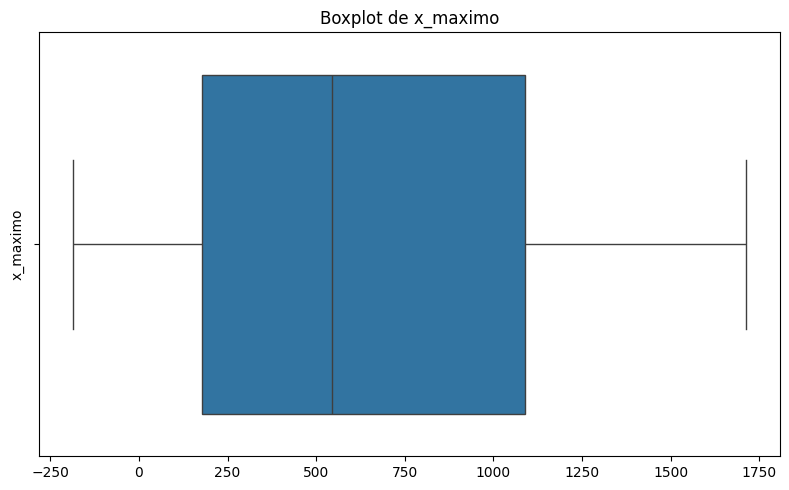

In [44]:
plot_boxplots(dados_def, 'x_maximo')

In [45]:
# Atribuindo o valor absoluto para os valores de medidas negativas, pois não há sentido físico:

dados_xmax_negativos = dados_def[dados_def['x_maximo'] < 0]
print(f"{len(dados_xmax_negativos)} registros.")

333 registros.


In [46]:
dados_def['x_maximo'] = list(map(abs, dados_def['x_maximo']))
dados_xmax_negativos_corr = dados_def[dados_def['x_maximo'] < 0]
print(f"{len(dados_xmax_negativos_corr)} registros.")

0 registros.


In [47]:
dados_def['x_maximo'].describe()

count    3334.000000
mean      643.055489
std       503.953699
min         4.000000
25%       186.000000
50%       544.000000
75%      1090.000000
max      1713.000000
Name: x_maximo, dtype: float64

In [48]:
# Removendo eventuais outliers e substituindo pela média:

Q1_xmax = dados_def['x_maximo'].quantile(0.25)
Q3_xmax = dados_def['x_maximo'].quantile(0.75)
IQR = Q3_xmax - Q1_xmax
limite_inferior_xmax = Q1_xmax - 1.5 * IQR
limite_superior_xmax = Q3_xmax + 1.5 * IQR

dados_def['x_maximo'] = dados_def['x_maximo'].apply(lambda x: np.nan if x <= limite_inferior_xmax or x >= limite_superior_xmax else x)
dados_def['x_maximo'].fillna(dados_def['x_maximo'].mean(), inplace=True)

<ipython-input-48-25ddedc8fa14>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['x_maximo'].fillna(dados_def['x_maximo'].mean(), inplace=True)


<Axes: ylabel='Frequency'>

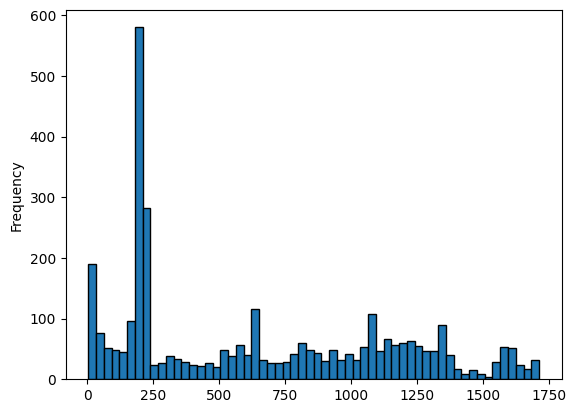

In [49]:
# Histrograma limpo:

dados_def['x_maximo'].plot(kind='hist', bins=bins, edgecolor='black')

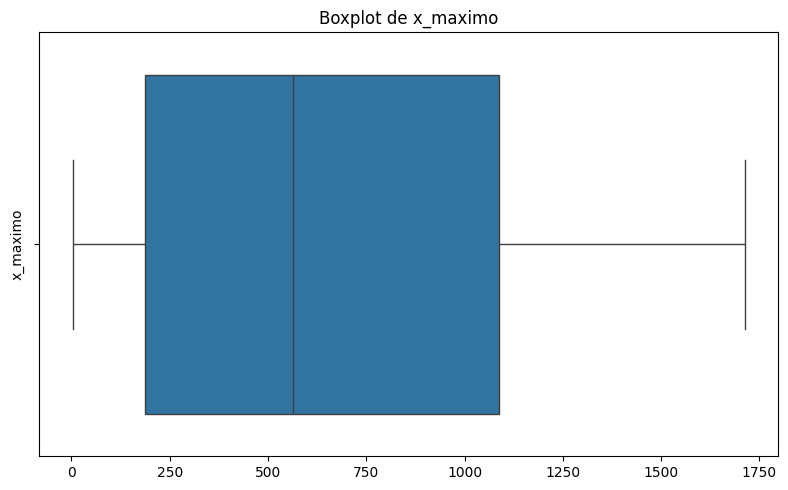

In [50]:
# BoxPlot Limpo:

plot_boxplots(dados_def, 'x_maximo')

In [51]:
# Seguindo:

# y_minimo [A menor coordenada Y da caixa delimitadora ao redor de um defeito ou característica na placa de aço.]:

dados_def['y_minimo'].describe()

count    3.390000e+03
mean     2.692640e+06
std      5.625693e+06
min     -2.000000e+01
25%      3.934352e+05
50%      1.265462e+06
75%      2.555025e+06
max      1.041366e+08
Name: y_minimo, dtype: float64

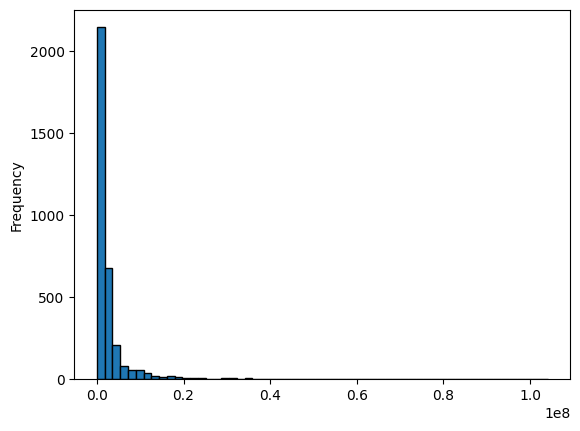

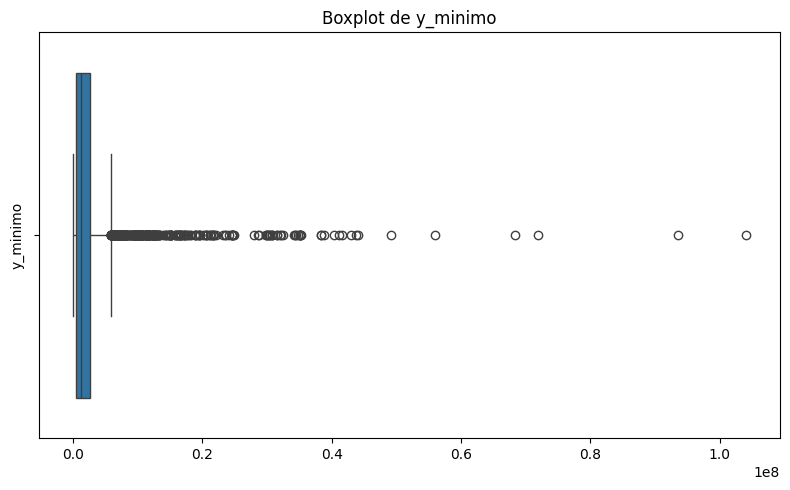

In [52]:
dados_def['y_minimo'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'y_minimo')

In [53]:
# Atribuindo o valor absoluto para os valores de medidas negativas:
# E também adicionando um filtr, pois é incompatível medidas tão grandes para chapas de aço:
# Mas mantendo a proporcionalidade:

dados_ymin_negativos = dados_def[dados_def['y_minimo'] < 0]
print(f"{len(dados_ymin_negativos)} registros.")

339 registros.


In [54]:
dados_def['y_minimo'] = list(map(abs, dados_def['y_minimo']))
dados_ymin_negativos_corr = dados_def[dados_def['y_minimo'] < 0]
print(f"{len(dados_ymin_negativos_corr)} registros.")

0 registros.


In [55]:
dados_def['y_minimo'].describe()

count    3.390000e+03
mean     2.692644e+06
std      5.625691e+06
min      2.000000e+01
25%      3.934352e+05
50%      1.265462e+06
75%      2.555025e+06
max      1.041366e+08
Name: y_minimo, dtype: float64

In [56]:
# Nota-se valores muito altos para um conjunto de medidas, vou padroniza-los:
# Trazendo para uma ordem de grandeza mais plausível e de acordo com o comprimento do transportador [10³]:

dados_def['y_minimo'] = dados_def['y_minimo'].apply(lambda x: x / 1000)

In [57]:
dados_def['y_minimo'].describe()

count      3390.000000
mean       2692.643620
std        5625.690864
min           0.020000
25%         393.435250
50%        1265.462500
75%        2555.025000
max      104136.555000
Name: y_minimo, dtype: float64

In [58]:
# Removendo eventuais outliers e substituindo pela média:

Q1_ymin = dados_def['y_minimo'].quantile(0.25)
Q3_ymin = dados_def['y_minimo'].quantile(0.75)
IQR = Q3_ymin - Q1_ymin
limite_inferior_ymin = Q1_ymin - 1.5 * IQR
limite_superior_ymin = Q3_ymin + 1.5 * IQR

dados_def['y_minimo'] = dados_def['y_minimo'].apply(lambda x: np.nan if x <= limite_inferior_ymin or x >= limite_superior_ymin else x)
dados_def['y_minimo'].fillna(dados_def['y_minimo'].mean(), inplace=True)

<ipython-input-58-1a15d88e675f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['y_minimo'].fillna(dados_def['y_minimo'].mean(), inplace=True)


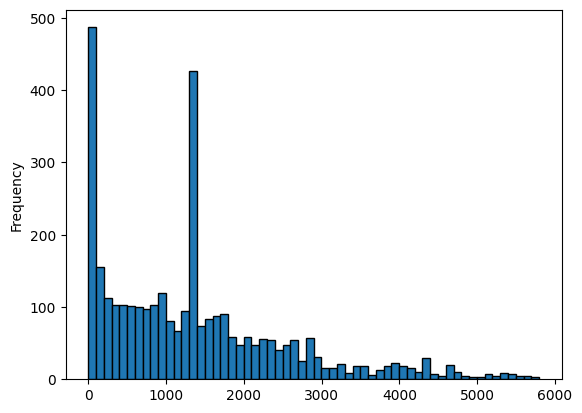

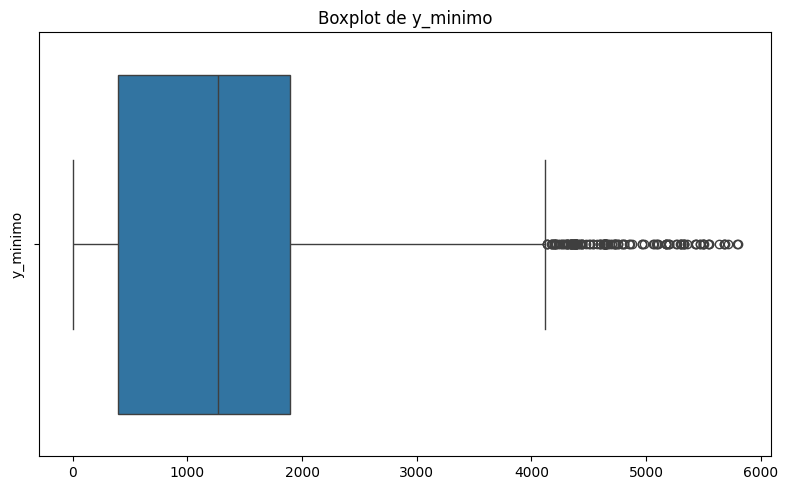

In [59]:
dados_def['y_minimo'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'y_minimo')

In [60]:
# Seguindo:

# y_maximo [A maior coordenada Y da caixa delimitadora ao redor de um defeito ou característica na placa de aço.]:

dados_def['y_maximo'].describe()

count    3.390000e+03
mean     1.592301e+06
std      1.821345e+06
min     -1.660000e+02
25%      3.407380e+05
50%      1.128297e+06
75%      2.184335e+06
max      1.291709e+07
Name: y_maximo, dtype: float64

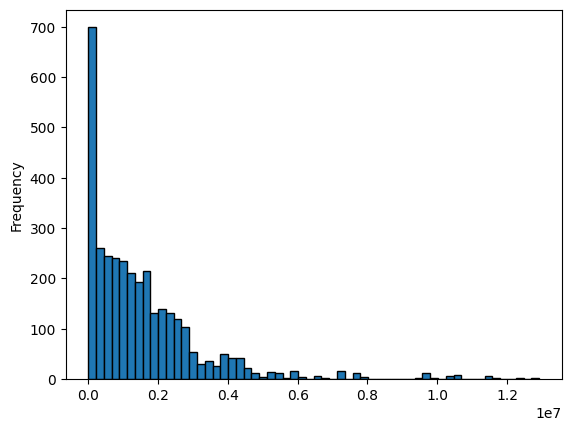

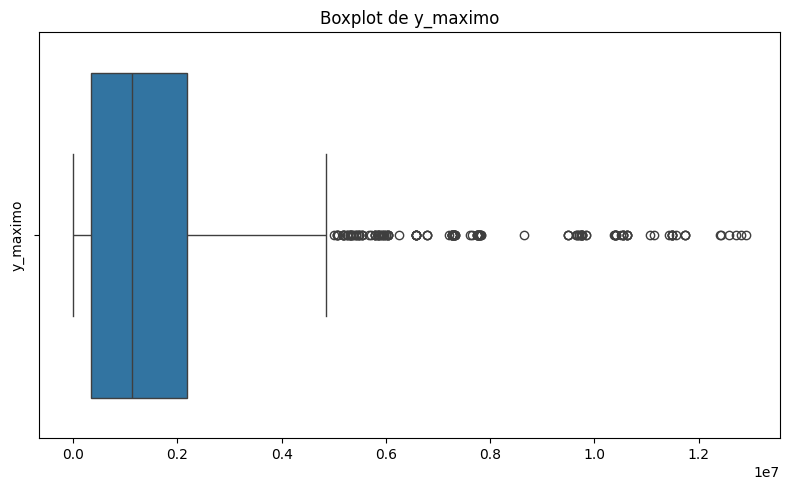

In [61]:
dados_def['y_maximo'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'y_maximo')

In [62]:
# Nota-se o mesmo problema anterior, portatno:

dados_def['y_maximo'] = dados_def['y_maximo'].apply(lambda x: x / 1000)

In [63]:
dados_def['y_maximo'].describe()

count     3390.000000
mean      1592.301394
std       1821.345271
min         -0.166000
25%        340.738000
50%       1128.297000
75%       2184.335000
max      12917.094000
Name: y_maximo, dtype: float64

In [64]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_ymax_negativos = dados_def[dados_def['y_maximo'] < 0]
print(f"{len(dados_ymax_negativos)} registros.")

339 registros.


In [65]:
dados_def['y_maximo'] = list(map(abs, dados_def['y_maximo']))
dados_ymax_negativos_corr = dados_def[dados_def['y_maximo'] < 0]
print(f"{len(dados_ymax_negativos_corr)} registros.")

0 registros.


In [66]:
dados_def['y_maximo'].describe()

count     3390.000000
mean      1592.334594
std       1821.316237
min          0.166000
25%        340.738000
50%       1128.297000
75%       2184.335000
max      12917.094000
Name: y_maximo, dtype: float64

In [67]:
# Removendo eventuais outliers e substituindo pela média:

Q1_ymax = dados_def['y_maximo'].quantile(0.25)
Q3_ymax = dados_def['y_maximo'].quantile(0.75)
IQR = Q3_ymax - Q1_ymax
limite_inferior_ymax = Q1_ymax - 1.5 * IQR
limite_superior_ymax = Q3_ymax + 1.5 * IQR

dados_def['y_maximo'] = dados_def['y_maximo'].apply(lambda x: np.nan if x <= limite_inferior_ymax or x >= limite_superior_ymax else x)
dados_def['y_maximo'].fillna(dados_def['y_maximo'].mean(), inplace=True)

<ipython-input-67-3be8e803779e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['y_maximo'].fillna(dados_def['y_maximo'].mean(), inplace=True)


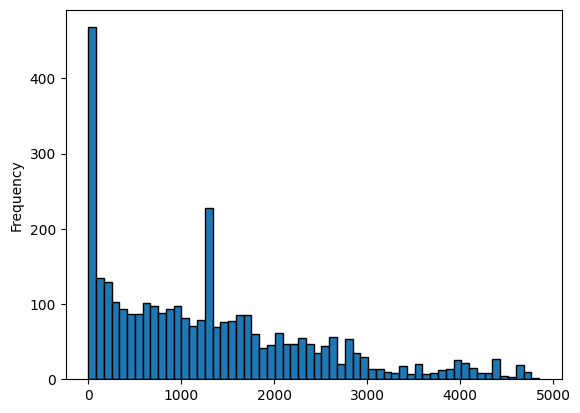

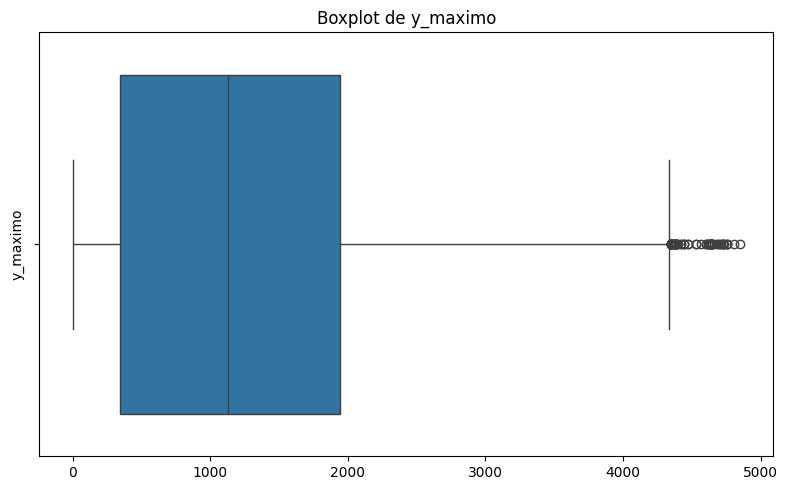

In [68]:
dados_def['y_maximo'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'y_maximo')

In [69]:
# Agora, a próxima variável:

# area_pixels [O número total de pixels dentro da região do defeito ou característica]:
# Também não faz sentido que seja negativa.

dados_def['area_pixels'].describe()

count      3390.000000
mean       1566.317699
std        4337.683975
min        -206.000000
25%          68.000000
50%         142.000000
75%         524.750000
max      152655.000000
Name: area_pixels, dtype: float64

In [70]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_apix_negativos = dados_def[dados_def['area_pixels'] < 0]
print(f"{len(dados_apix_negativos)} registros.")

339 registros.


In [71]:
dados_def['area_pixels'] = list(map(abs, dados_def['area_pixels']))
dados_apix_negativos_corr = dados_def[dados_def['area_pixels'] < 0]
print(f"{len(dados_apix_negativos_corr)} registros.")

0 registros.


In [72]:
dados_def['area_pixels'].describe()

count      3390.000000
mean       1607.517699
std        4322.580441
min           2.000000
25%          99.000000
50%         196.000000
75%         524.750000
max      152655.000000
Name: area_pixels, dtype: float64

In [73]:
# Removendo eventuais outliers e substituindo pela média:

Q1_apix = dados_def['area_pixels'].quantile(0.25)
Q3_apix = dados_def['area_pixels'].quantile(0.75)
IQR = Q3_apix - Q1_apix
limite_inferior_apix = Q1_apix - 1.5 * IQR
limite_superior_apix = Q3_apix + 1.5 * IQR

dados_def['area_pixels'] = dados_def['area_pixels'].apply(lambda x: np.nan if x <= limite_inferior_apix or x >= limite_superior_apix else x)
dados_def['area_pixels'].fillna(dados_def['area_pixels'].mean(), inplace=True)

<ipython-input-73-e4e804114165>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['area_pixels'].fillna(dados_def['area_pixels'].mean(), inplace=True)


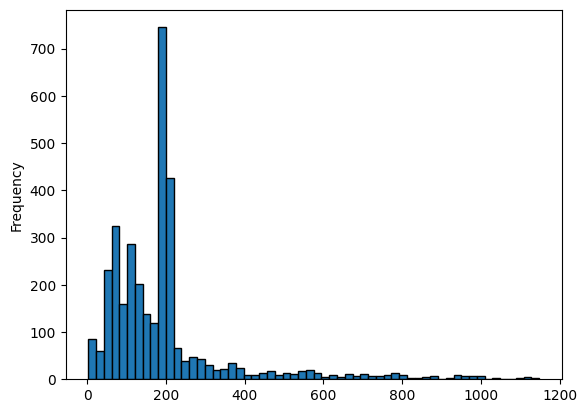

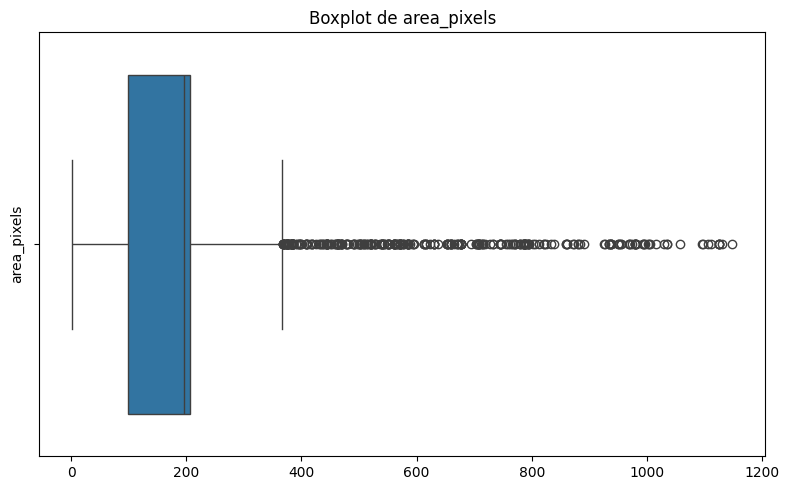

In [74]:
dados_def['area_pixels'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'area_pixels')

In [75]:
# A próxima variável:

# perimetro_x [O perímetro (comprimento da borda) do defeito ou característica ao longo do eixo X.]:
# Também não faz sentido que seja negativa.

dados_def['perimetro_x'].describe()

count    3390.000000
mean       66.733923
std       195.092105
min      -229.000000
25%        12.000000
50%        22.000000
75%        58.000000
max      1275.000000
Name: perimetro_x, dtype: float64

In [76]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_perx_negativos = dados_def[dados_def['perimetro_x'] < 0]
print(f"{len(dados_perx_negativos)} registros.")

339 registros.


In [77]:
dados_def['perimetro_x'] = list(map(abs, dados_def['perimetro_x']))
dados_perx_negativos_corr = dados_def[dados_def['perimetro_x'] < 0]
print(f"{len(dados_perx_negativos_corr)} registros.")

0 registros.


In [78]:
dados_def['perimetro_x'].describe()

count    3390.000000
mean      112.533923
std       172.765851
min         2.000000
25%        15.000000
50%        28.000000
75%       206.000000
max      1275.000000
Name: perimetro_x, dtype: float64

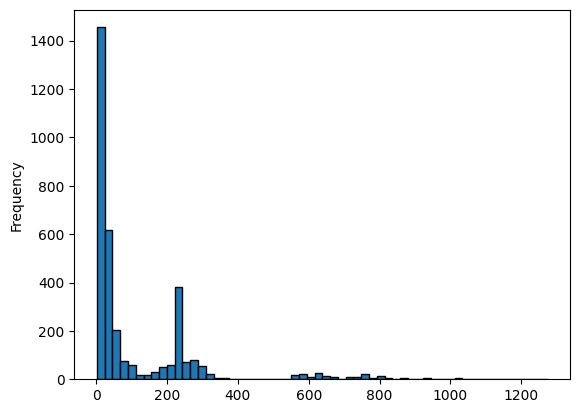

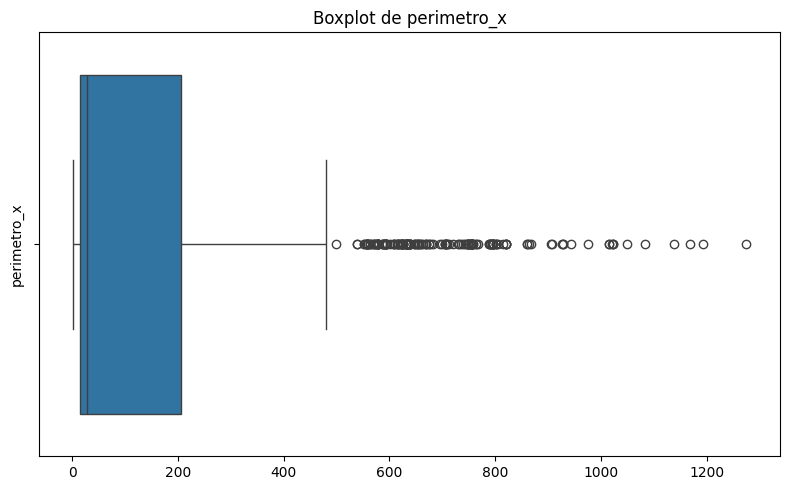

In [79]:
dados_def['perimetro_x'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'perimetro_x')

In [80]:
# Removendo eventuais outliers e substituindo pela média:

Q1_perx = dados_def['perimetro_x'].quantile(0.25)
Q3_perx = dados_def['perimetro_x'].quantile(0.75)
IQR = Q3_perx - Q1_perx
limite_inferior_perx = Q1_perx - 1.5 * IQR
limite_superior_perx = Q3_perx + 1.5 * IQR

dados_def['perimetro_x'] = dados_def['perimetro_x'].apply(lambda x: np.nan if x <= limite_inferior_perx or x >= limite_superior_perx else x)
dados_def['perimetro_x'].fillna(dados_def['perimetro_x'].mean(), inplace=True)

<ipython-input-80-1cc604f71469>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['perimetro_x'].fillna(dados_def['perimetro_x'].mean(), inplace=True)


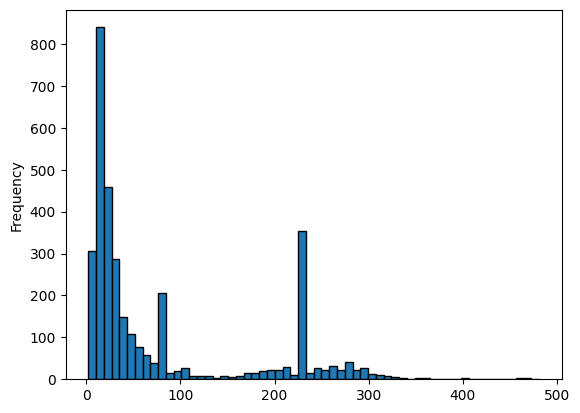

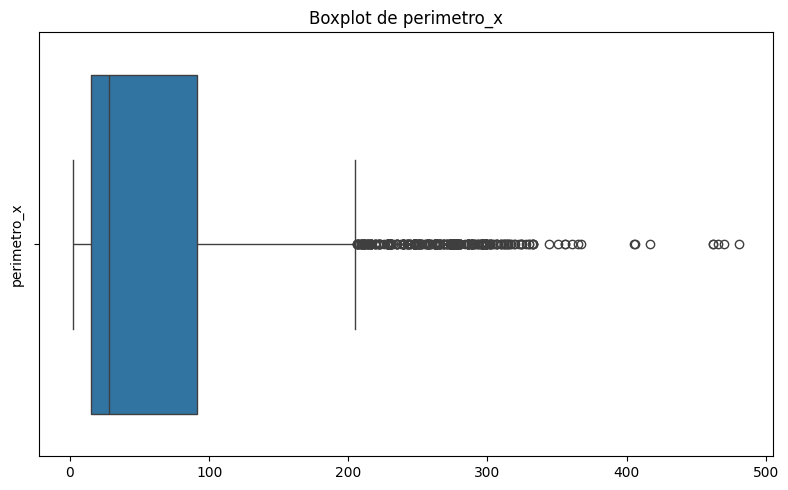

In [81]:
dados_def['perimetro_x'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'perimetro_x')

In [82]:
# A próxima variável:

# perimetro_y [O perímetro (comprimento da borda) do defeito ou característica ao longo do eixo Y.]:
# Também não faz sentido que seja negativa.

dados_def['perimetro_y'].describe()

count     3390.000000
mean        47.261062
std        336.794632
min       -194.000000
25%         11.000000
50%         21.000000
75%         56.000000
max      18152.000000
Name: perimetro_y, dtype: float64

In [83]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_pery_negativos = dados_def[dados_def['perimetro_y'] < 0]
print(f"{len(dados_pery_negativos)} registros.")

339 registros.


In [84]:
dados_def['perimetro_y'] = list(map(abs, dados_def['perimetro_y']))
dados_pery_negativos_corr = dados_def[dados_def['perimetro_y'] < 0]
print(f"{len(dados_pery_negativos_corr)} registros.")

0 registros.


In [85]:
dados_def['perimetro_y'].describe()

count     3390.000000
mean        86.061062
std        329.023099
min          2.000000
25%         14.000000
50%         28.000000
75%        127.000000
max      18152.000000
Name: perimetro_y, dtype: float64

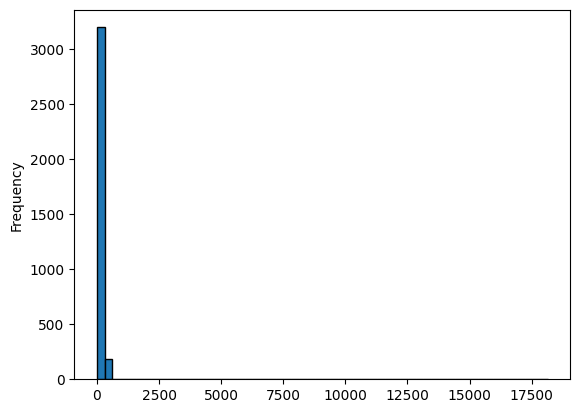

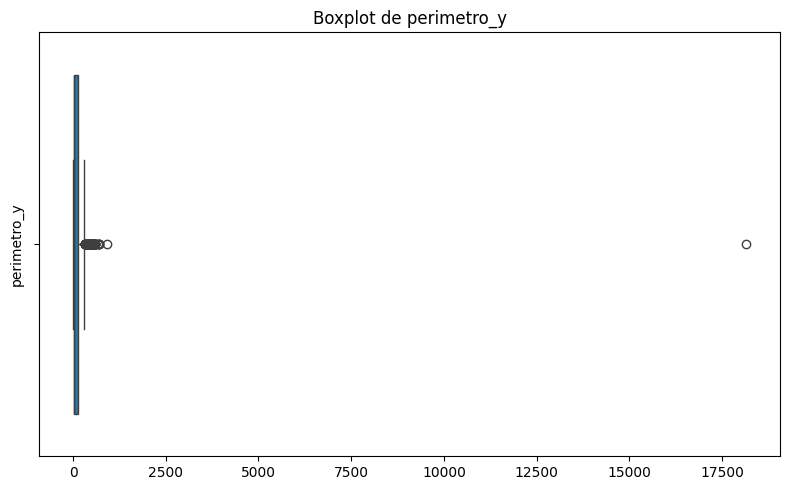

In [86]:
dados_def['perimetro_y'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'perimetro_y')

In [87]:
# Removendo eventuais outliers e substituindo pela média:

Q1_pery = dados_def['perimetro_y'].quantile(0.25)
Q3_pery = dados_def['perimetro_y'].quantile(0.75)
IQR = Q3_pery - Q1_pery
limite_inferior_pery = Q1_pery - 1.5 * IQR
limite_superior_pery = Q3_pery + 1.5 * IQR

dados_def['perimetro_y'] = dados_def['perimetro_y'].apply(lambda x: np.nan if x <= limite_inferior_pery or x >= limite_superior_pery else x)
dados_def['perimetro_y'].fillna(dados_def['perimetro_y'].mean(), inplace=True)

<ipython-input-87-9ae65b910354>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['perimetro_y'].fillna(dados_def['perimetro_y'].mean(), inplace=True)


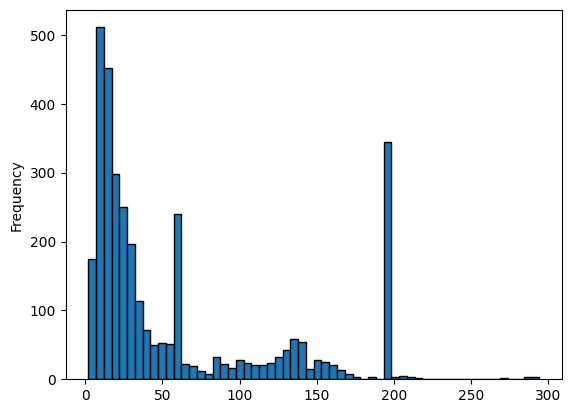

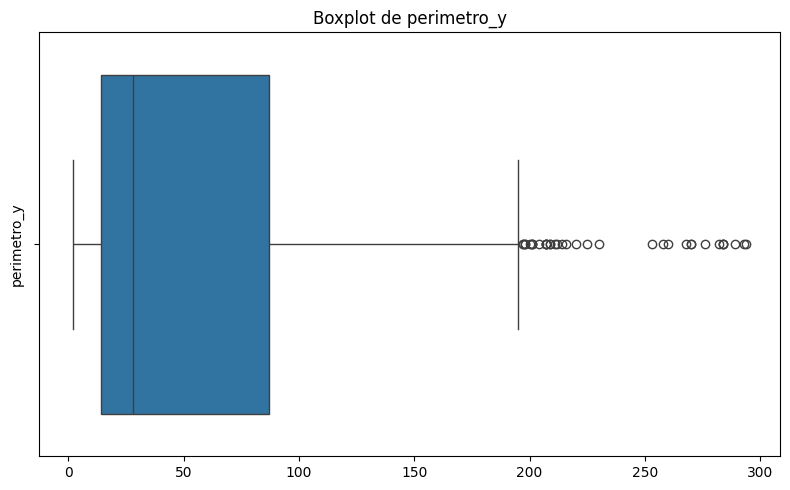

In [88]:
dados_def['perimetro_y'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'perimetro_y')

In [89]:
# A próxima variável:

# comprimento_do_transportador [O perímetro (comprimento da borda) do defeito ou característica ao longo do eixo Y.]:
# Também não faz sentido que seja negativa.

dados_def['comprimento_do_transportador'].describe()

count    3390.000000
mean     1293.171681
std       521.109121
min      -214.000000
25%      1356.000000
50%      1362.000000
75%      1634.000000
max      1794.000000
Name: comprimento_do_transportador, dtype: float64

In [90]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_compt_negativos = dados_def[dados_def['comprimento_do_transportador'] < 0]
print(f"{len(dados_compt_negativos)} registros.")

339 registros.


In [91]:
dados_def['comprimento_do_transportador'] = list(map(abs, dados_def['comprimento_do_transportador']))
dados_compt_negativos_corr = dados_def[dados_def['comprimento_do_transportador'] < 0]
print(f"{len(dados_compt_negativos_corr)} registros.")

0 registros.


In [92]:
dados_def['comprimento_do_transportador'].describe()

count    3390.000000
mean     1335.971681
std       398.740739
min       214.000000
25%      1356.000000
50%      1362.000000
75%      1634.000000
max      1794.000000
Name: comprimento_do_transportador, dtype: float64

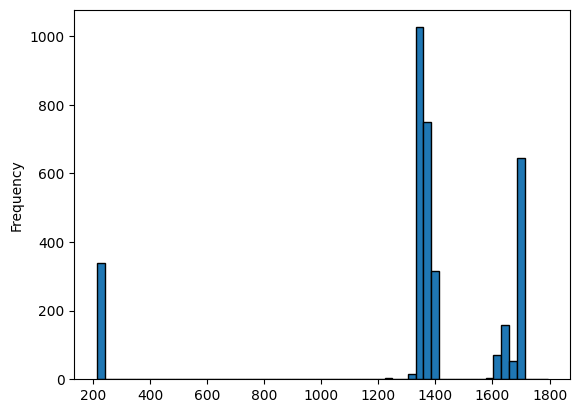

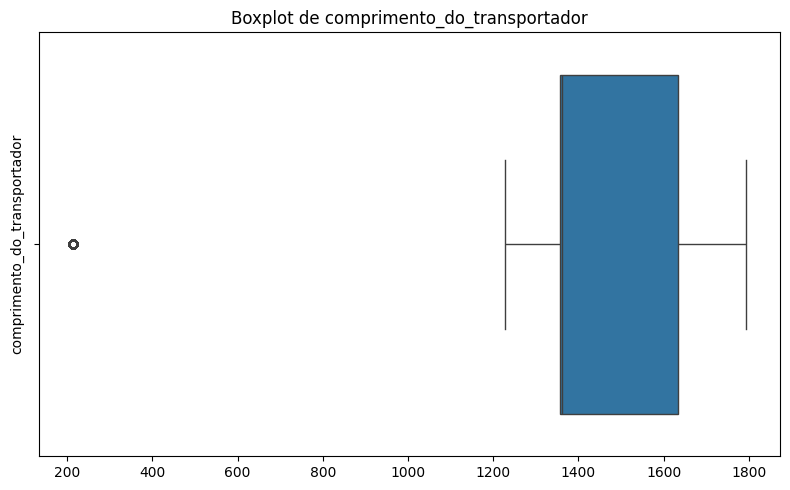

In [93]:
dados_def['comprimento_do_transportador'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'comprimento_do_transportador')

In [94]:
# Removendo eventuais outliers e substituindo pela média:

Q1_compt = dados_def['comprimento_do_transportador'].quantile(0.25)
Q3_compt = dados_def['comprimento_do_transportador'].quantile(0.75)
IQR = Q3_compt - Q1_compt
limite_inferior_compt = Q1_compt - 1.5 * IQR
limite_superior_compt = Q3_compt + 1.5 * IQR

dados_def['comprimento_do_transportador'] = dados_def['comprimento_do_transportador'].apply(lambda x: np.nan if x <= limite_inferior_compt or x >= limite_superior_compt else x)
dados_def['comprimento_do_transportador'].fillna(dados_def['comprimento_do_transportador'].mean(), inplace=True)

<ipython-input-94-8c24d6f627b6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['comprimento_do_transportador'].fillna(dados_def['comprimento_do_transportador'].mean(), inplace=True)


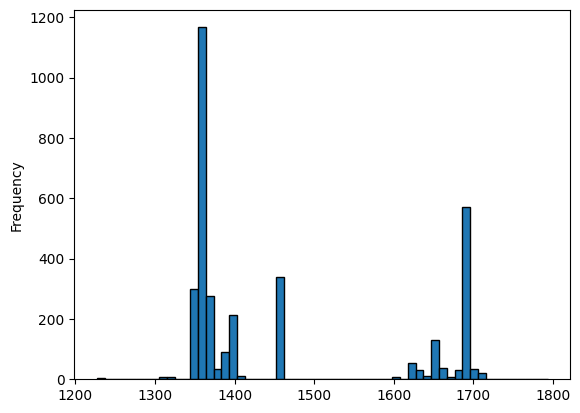

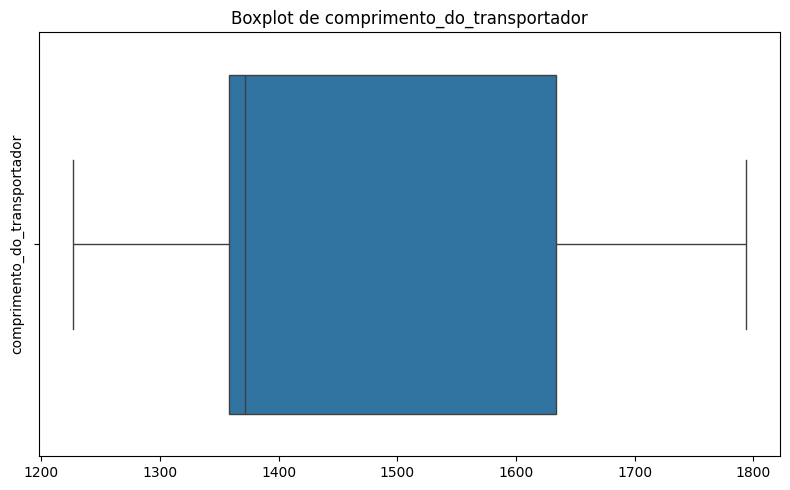

In [95]:
dados_def['comprimento_do_transportador'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'comprimento_do_transportador')

In [96]:
# A próxima variável:

# espessura_da_chapa_de_aço [Espessura da chapa de aço.]:
# Também não faz sentido que seja negativa.

dados_def['espessura_da_chapa_de_aço'].describe()

count    3349.000000
mean       53.130487
std        85.295729
min      -154.000000
25%        40.000000
50%        60.000000
75%        80.000000
max       300.000000
Name: espessura_da_chapa_de_aço, dtype: float64

In [97]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_esp_negativos = dados_def[dados_def['espessura_da_chapa_de_aço'] < 0]
print(f"{len(dados_esp_negativos)} registros.")

338 registros.


In [98]:
dados_def['espessura_da_chapa_de_aço'] = list(map(abs, dados_def['espessura_da_chapa_de_aço']))
dados_esp_negativos_corr = dados_def[dados_def['espessura_da_chapa_de_aço'] < 0]
print(f"{len(dados_esp_negativos_corr)} registros.")

0 registros.


In [99]:
dados_def['espessura_da_chapa_de_aço'].describe()

count    3349.000000
mean       84.215587
std        54.814868
min        40.000000
25%        40.000000
50%        70.000000
75%       100.000000
max       300.000000
Name: espessura_da_chapa_de_aço, dtype: float64

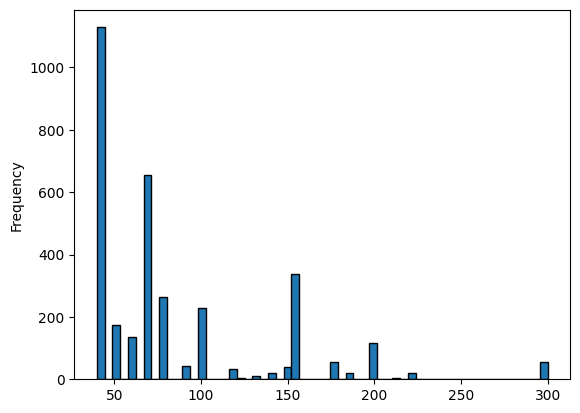

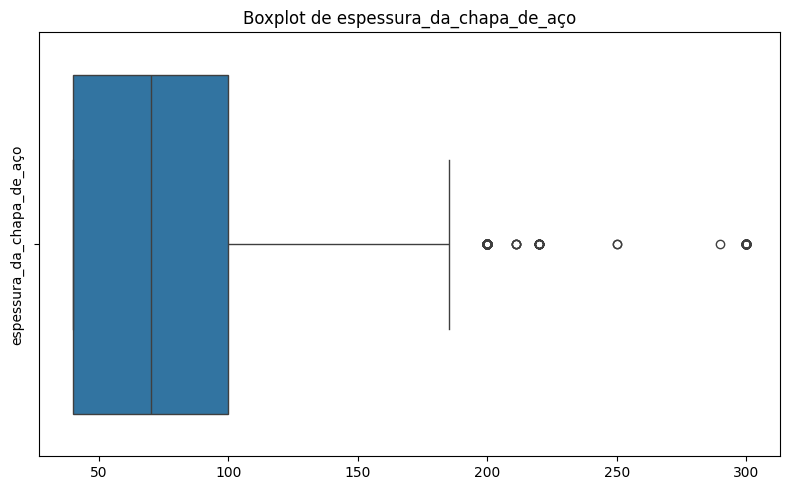

In [100]:
dados_def['espessura_da_chapa_de_aço'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'espessura_da_chapa_de_aço')

In [101]:
# Removendo eventuais outliers e substituindo pela média:

Q1_esp = dados_def['espessura_da_chapa_de_aço'].quantile(0.25)
Q3_esp = dados_def['espessura_da_chapa_de_aço'].quantile(0.75)
IQR = Q3_esp - Q1_esp
limite_inferior_esp = Q1_esp - 1.5 * IQR
limite_superior_esp = Q3_esp + 1.5 * IQR

dados_def['espessura_da_chapa_de_aço'] = dados_def['espessura_da_chapa_de_aço'].apply(lambda x: np.nan if x <= limite_inferior_esp or x >= limite_superior_esp else x)
dados_def['espessura_da_chapa_de_aço'].fillna(dados_def['espessura_da_chapa_de_aço'].mean(), inplace=True)

<ipython-input-101-a33fd132234f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['espessura_da_chapa_de_aço'].fillna(dados_def['espessura_da_chapa_de_aço'].mean(), inplace=True)


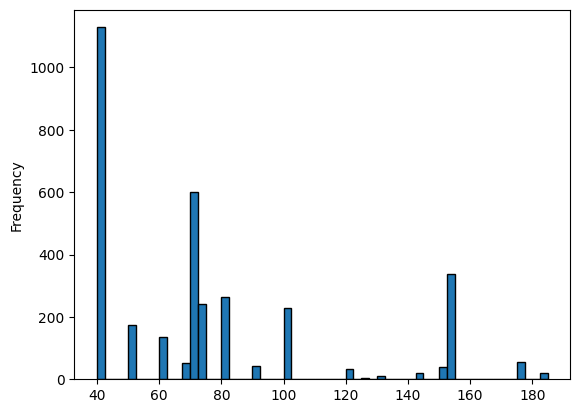

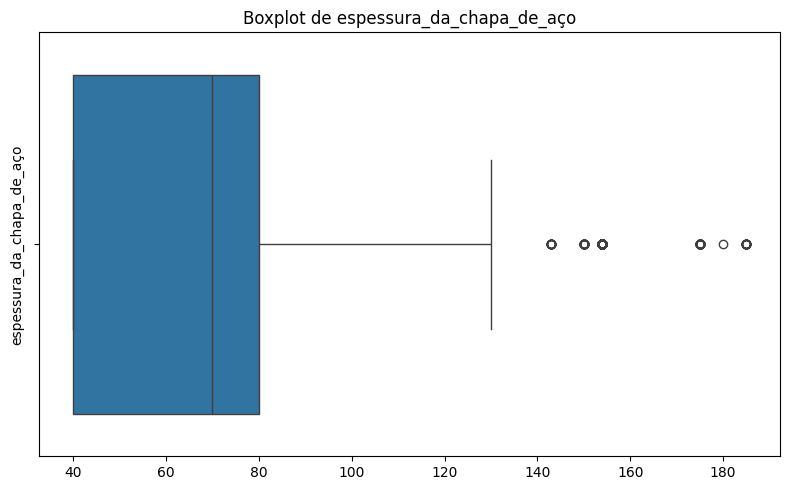

In [102]:
dados_def['espessura_da_chapa_de_aço'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'espessura_da_chapa_de_aço')

In [103]:
# A próxima variável:

# temperatura [Temperatura do processo.]:
# Também não faz sentido que seja negativa.

dados_def['temperatura'].describe()

count    3390.000000
mean       79.924760
std        10.000343
min        45.801848
25%        73.137252
50%        79.785356
75%        86.593446
max       121.478951
Name: temperatura, dtype: float64

In [104]:
# Atribuindo o valor absoluto para os valores de medidas negativas:

dados_temp_negativos = dados_def[dados_def['temperatura'] < 0]
print(f"{len(dados_temp_negativos)} registros.")

0 registros.


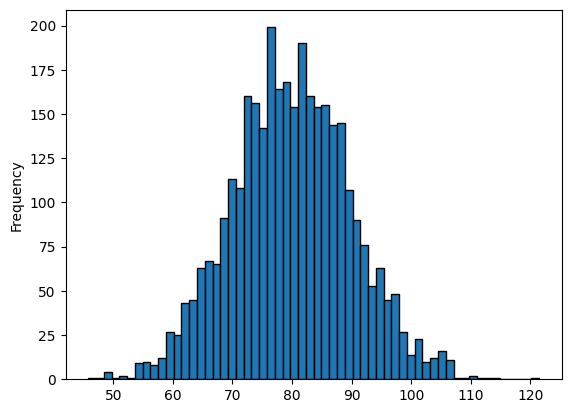

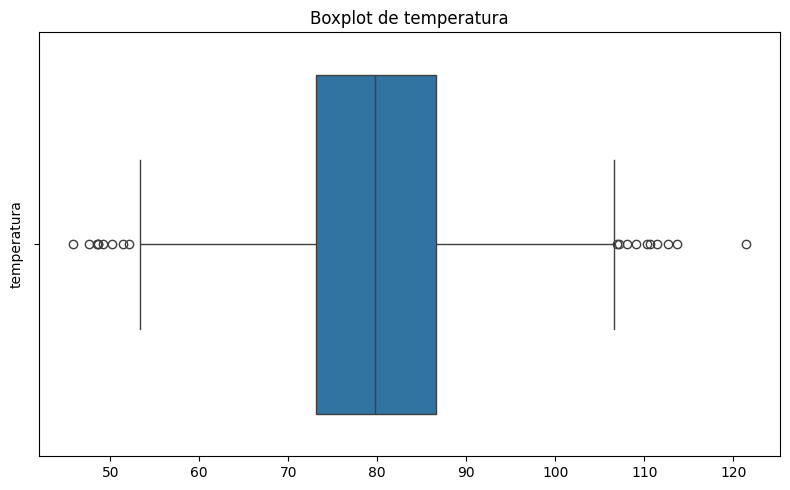

In [105]:
dados_def['temperatura'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'temperatura')

In [106]:
# Removendo eventuais outliers e substituindo pela média:

Q1_temp = dados_def['temperatura'].quantile(0.25)
Q3_temp = dados_def['temperatura'].quantile(0.75)
IQR = Q3_temp - Q1_temp
limite_inferior_temp = Q1_temp - 1.5 * IQR
limite_superior_temp = Q3_temp + 1.5 * IQR

dados_def['temperatura'] = dados_def['temperatura'].apply(lambda x: np.nan if x <= limite_inferior_temp or x >= limite_superior_temp else x)
dados_def['temperatura'].fillna(dados_def['temperatura'].mean(), inplace=True)

<ipython-input-106-59e0eaa798cc>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['temperatura'].fillna(dados_def['temperatura'].mean(), inplace=True)


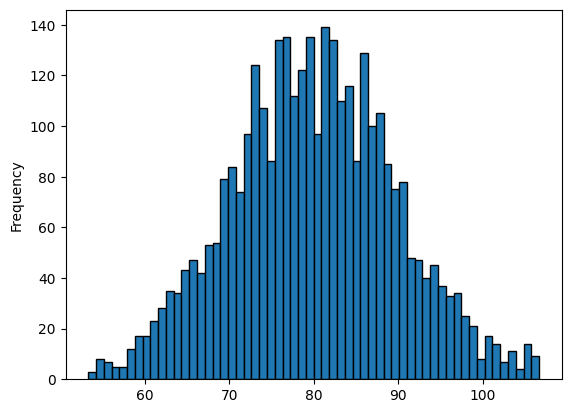

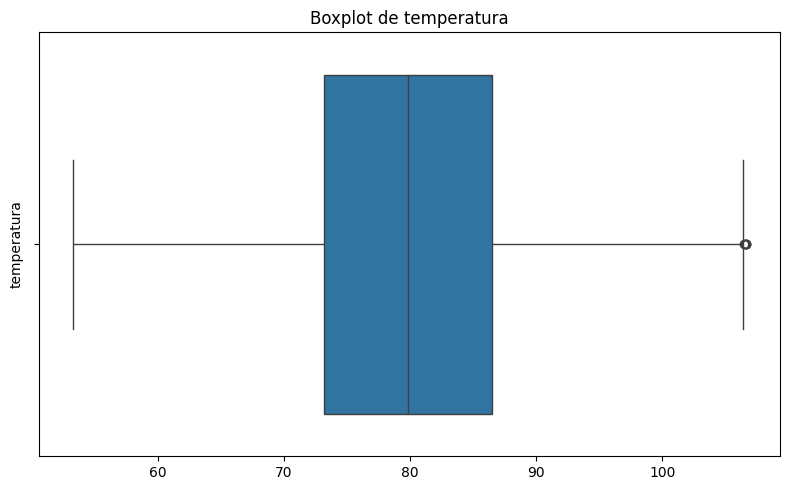

In [107]:
dados_def['temperatura'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'temperatura')

In [108]:
# A próxima variável:

# index_de_bordas [Índice que indica a razão entre o comprimento das bordas e o comprimento total da borda do defeito ou característica.]:
# Também não faz sentido que seja negativa.

dados_def['index_de_bordas'].describe()

count    3390.000000
mean        0.340712
std         0.307037
min         0.000000
25%         0.060400
50%         0.232400
75%         0.621650
max         0.995200
Name: index_de_bordas, dtype: float64

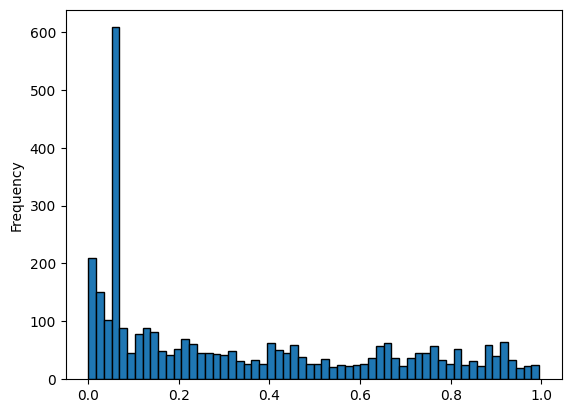

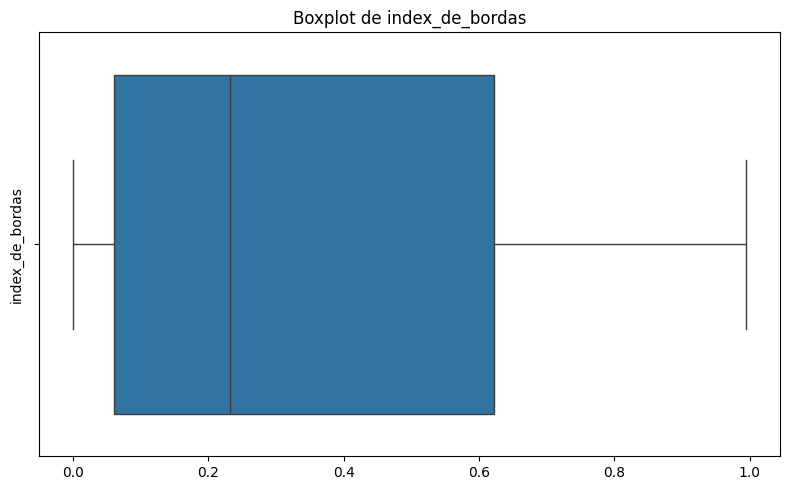

In [109]:
dados_def['index_de_bordas'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'index_de_bordas')

In [110]:
# Não necessita tratamento.
# A próxima variável:

# index_vazio [Índice que indica a razão entre os espaços vazios (fundo) e a área total do defeito ou característica.]:
# Também não faz sentido que seja negativa.

dados_def['index_vazio'].describe()

count    3390.000000
mean        0.409954
std         0.133362
min         0.000000
25%         0.313350
50%         0.409750
75%         0.495975
max         0.943900
Name: index_vazio, dtype: float64

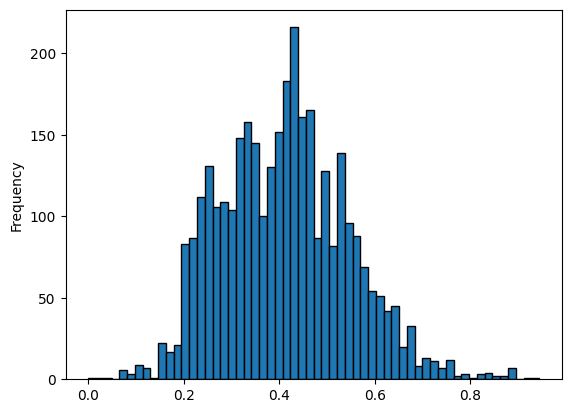

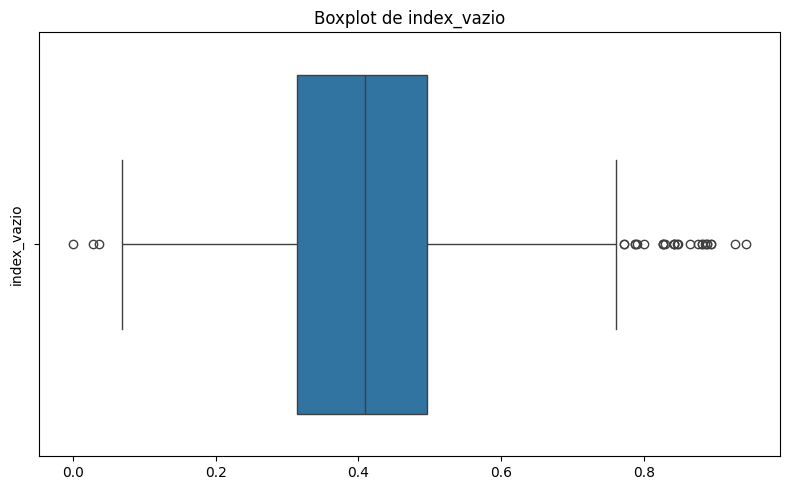

In [111]:
dados_def['index_vazio'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'index_vazio')

In [112]:
# Nota-se alguns outliers, mas não valores negativos.

In [113]:
# Removendo eventuais outliers e substituindo pela média:

Q1_iv = dados_def['index_vazio'].quantile(0.25)
Q3_iv = dados_def['index_vazio'].quantile(0.75)
IQR = Q3_iv - Q1_iv
limite_inferior_iv = Q1_iv - 1.5 * IQR
limite_superior_iv = Q3_iv + 1.5 * IQR

dados_def['index_vazio'] = dados_def['index_vazio'].apply(lambda x: np.nan if x <= limite_inferior_iv or x >= limite_superior_iv else x)
dados_def['index_vazio'].fillna(dados_def['index_vazio'].mean(), inplace=True)

<ipython-input-113-1e9a369b2bf0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['index_vazio'].fillna(dados_def['index_vazio'].mean(), inplace=True)


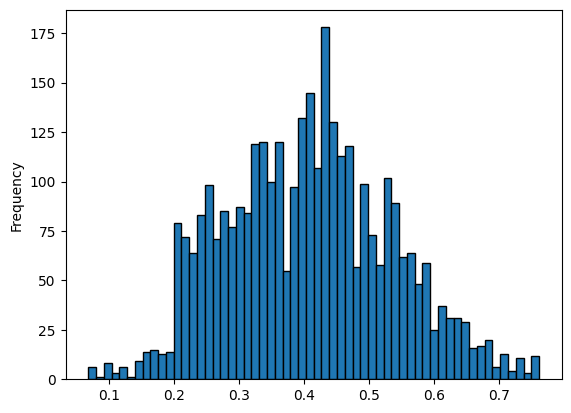

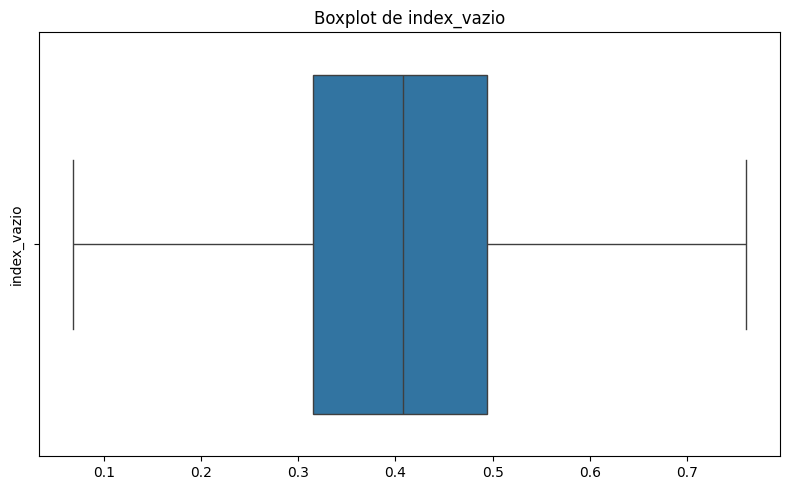

In [114]:
dados_def['index_vazio'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'index_vazio')

In [115]:
# A próxima variável:

# index_vazio [Índice que indica a razão entre os espaços vazios (fundo) e a área total do defeito ou característica.]:
# Também não faz sentido que seja negativa.

dados_def['index_quadrado'].describe()

count    3354.000000
mean        0.572069
std         0.263772
min         0.008300
25%         0.367200
50%         0.545400
75%         0.818200
max         1.000000
Name: index_quadrado, dtype: float64

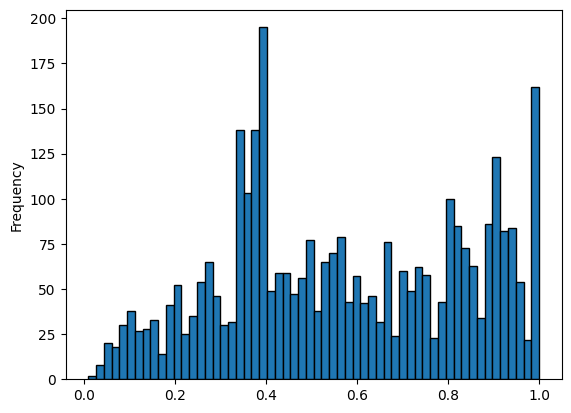

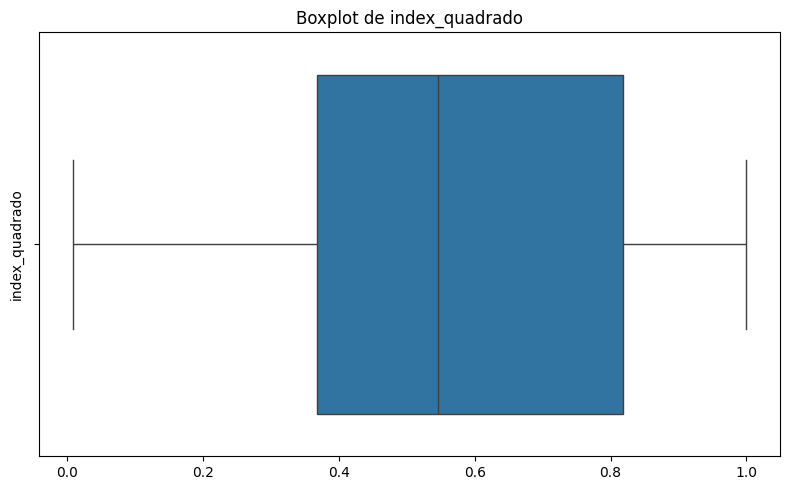

In [116]:
dados_def['index_quadrado'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'index_quadrado')

In [117]:
# Parece bem distribuído, apenas atribuindo os valores faltantes pela média:

dados_def['index_quadrado'].fillna(dados_def['index_quadrado'].mean(), inplace=True)

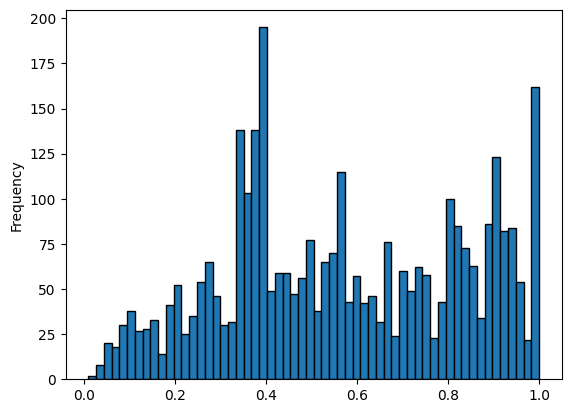

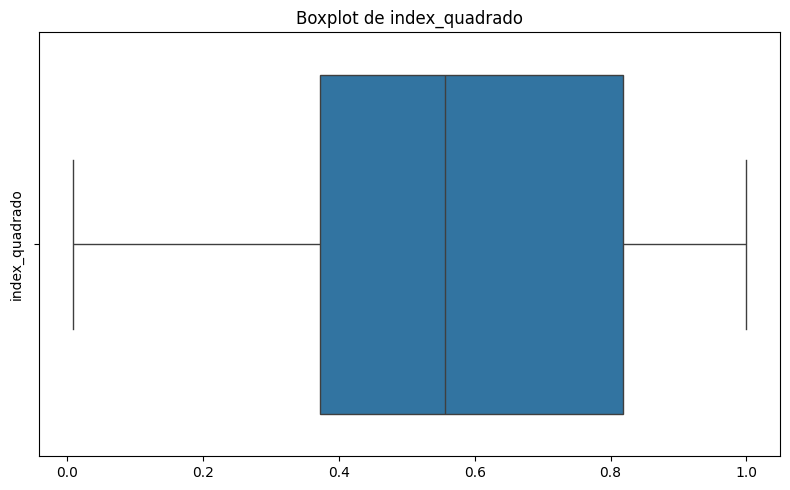

In [118]:
dados_def['index_quadrado'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'index_quadrado')

In [119]:
# A próxima variável:

# log_das_areas [Índice que indica a razão entre os espaços vazios (fundo) e a área total do defeito ou característica.]:
# Também não faz sentido que seja negativa.

dados_def['log_das_areas'].describe()

count    3390.000000
mean        2.476344
std         0.772512
min         0.301000
25%         1.929400
50%         2.225300
75%         2.829625
max         5.183700
Name: log_das_areas, dtype: float64

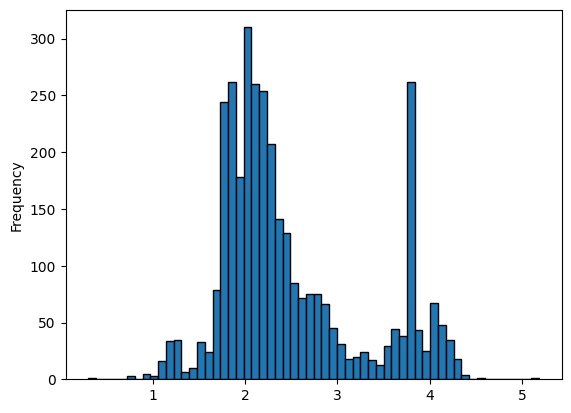

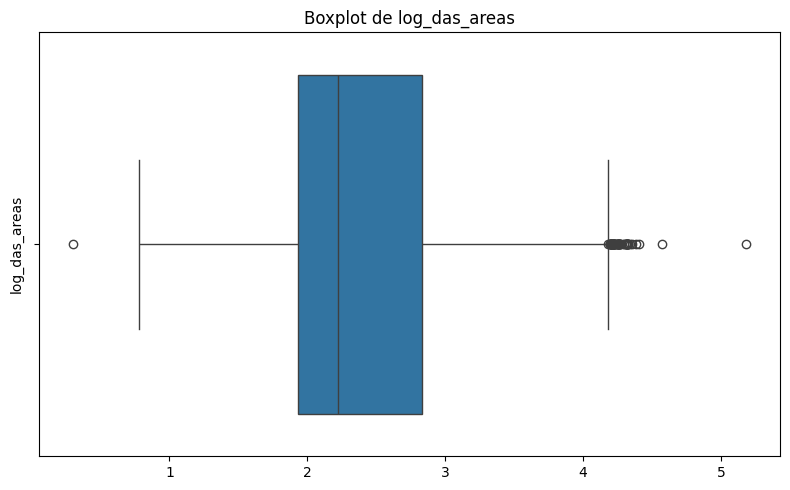

In [120]:
dados_def['log_das_areas'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'log_das_areas')

In [121]:
# Notam-se alguns outliers, mas não valores negativos:
# Removendo eventuais outliers e substituindo pela média:

Q1_loga = dados_def['log_das_areas'].quantile(0.25)
Q3_loga = dados_def['log_das_areas'].quantile(0.75)
IQR_loga = Q3_loga - Q1_loga
limite_inferior_loga = Q1_loga - 1.5 * IQR_loga
limite_superior_loga = Q3_loga + 1.5 * IQR_loga

dados_def['log_das_areas'] = dados_def['log_das_areas'].apply(lambda x: np.nan if x <= limite_inferior_loga or x >= limite_superior_loga else x)
dados_def['log_das_areas'].fillna(dados_def['log_das_areas'].mean(), inplace=True)

<ipython-input-121-a88e76b00dda>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['log_das_areas'].fillna(dados_def['log_das_areas'].mean(), inplace=True)


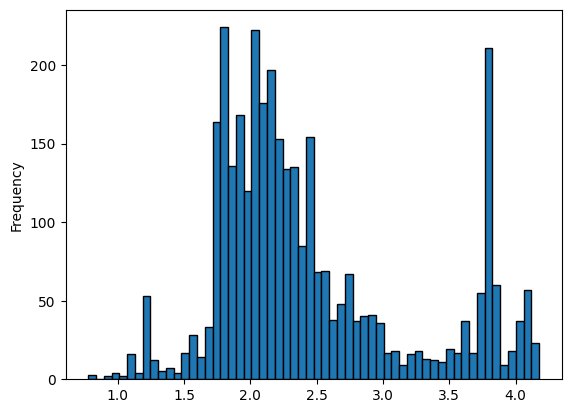

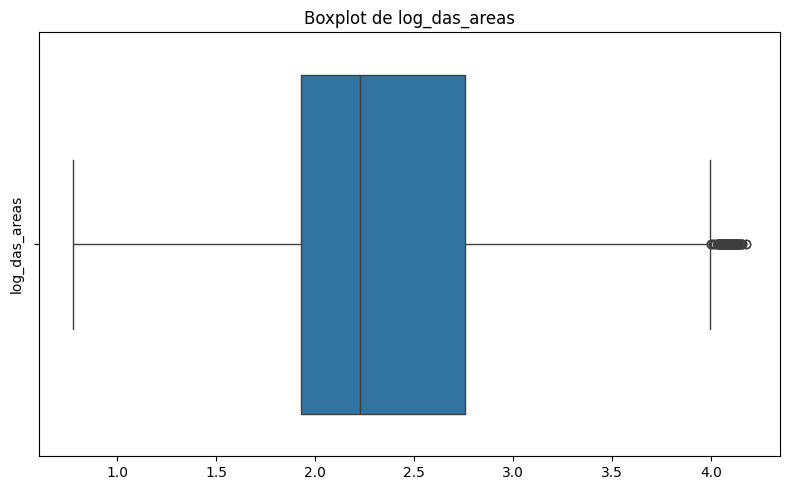

In [122]:
dados_def['log_das_areas'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'log_das_areas')

In [123]:
# A próxima variável:

# log_indice_x [Índice que indica o logaritmo da razão entre o comprimento das bordas ao longo do eixo X e o comprimento total das bordas.]:
# Também não faz sentido que seja negativa.

dados_def['log_indice_x'].describe()

count    3390.000000
mean        1.317755
std         0.479221
min         0.301000
25%         1.000000
50%         1.146100
75%         1.477100
max         3.074100
Name: log_indice_x, dtype: float64

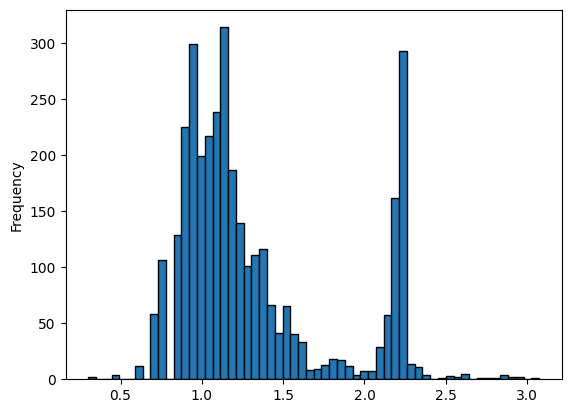

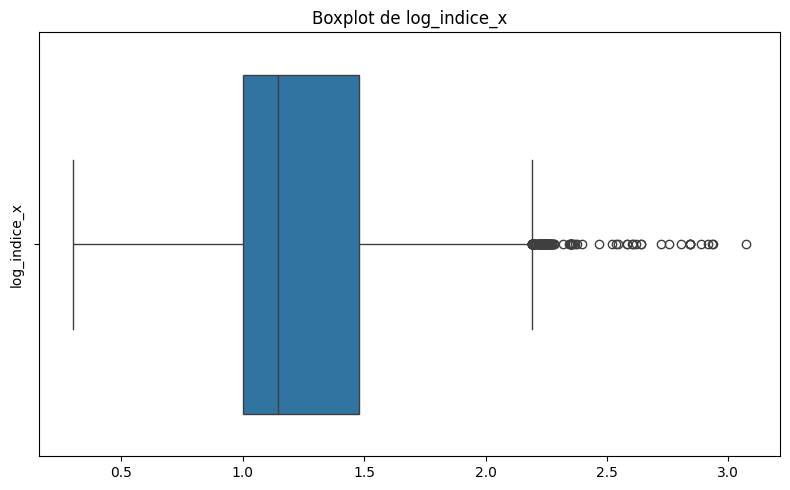

In [124]:
dados_def['log_indice_x'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'log_indice_x')

In [125]:
# Notam-se alguns outliers, mas não valores negativos:
# Removendo eventuais outliers e substituindo pela média:

Q1_logx = dados_def['log_indice_x'].quantile(0.25)
Q3_logx = dados_def['log_indice_x'].quantile(0.75)
IQR_logx = Q3_logx - Q1_logx
limite_inferior_logx = Q1_logx - 1.5 * IQR_logx
limite_superior_logx = Q3_logx + 1.5 * IQR_logx

dados_def['log_indice_x'] = dados_def['log_indice_x'].apply(lambda x: np.nan if x <= limite_inferior_logx or x >= limite_superior_logx else x)
dados_def['log_indice_x'].fillna(dados_def['log_indice_x'].mean(), inplace=True)

<ipython-input-125-842186f3c195>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['log_indice_x'].fillna(dados_def['log_indice_x'].mean(), inplace=True)


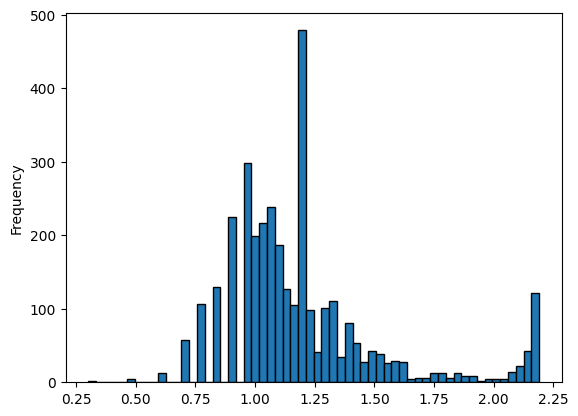

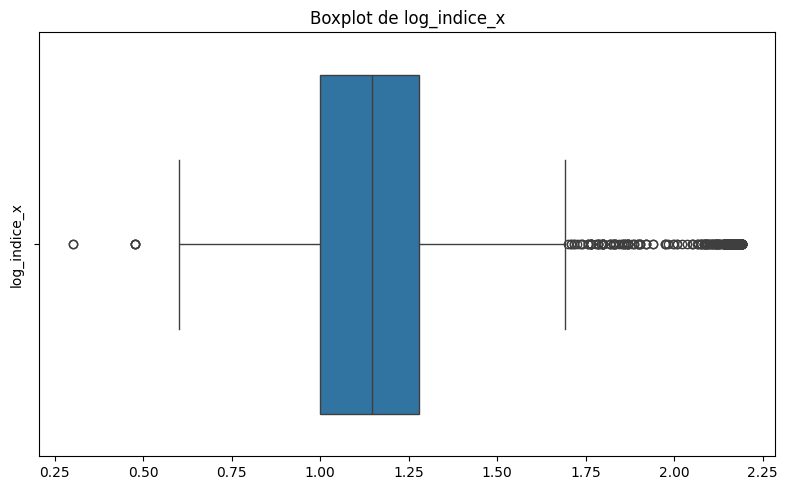

In [126]:
dados_def['log_indice_x'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'log_indice_x')

In [127]:
# A próxima variável:

# log_indice_y [Índice que indica o logaritmo da razão entre o comprimento das bordas ao longo do eixo Y e o comprimento total das bordas.]:
# Também não faz sentido que seja negativa.

dados_def['log_indice_y'].describe()

count    3390.000000
mean        1.395298
std         0.429142
min         0.000000
25%         1.079200
50%         1.322200
75%         1.724300
max         4.258700
Name: log_indice_y, dtype: float64

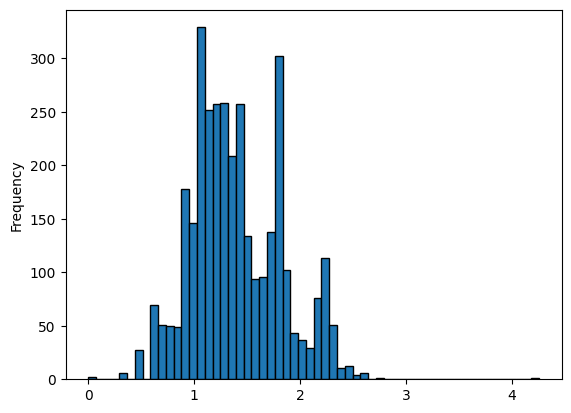

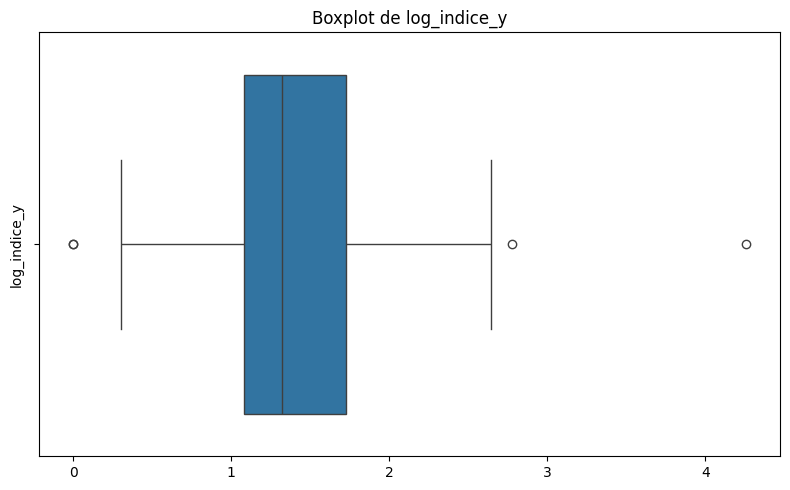

In [128]:
dados_def['log_indice_y'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'log_indice_y')

In [129]:
# Os dados parecem bem distribuídos.
# A próxima variável:
# indice_de_orientaçao [Índice que indica a orientação do defeito ou característica dentro da imagem.]:
# Pode ser que seja negativa.

dados_def['indice_de_orientaçao'].describe()

count    3390.000000
mean        0.099153
std         0.492312
min        -0.991000
25%        -0.285700
50%         0.111100
75%         0.526300
max         0.991700
Name: indice_de_orientaçao, dtype: float64

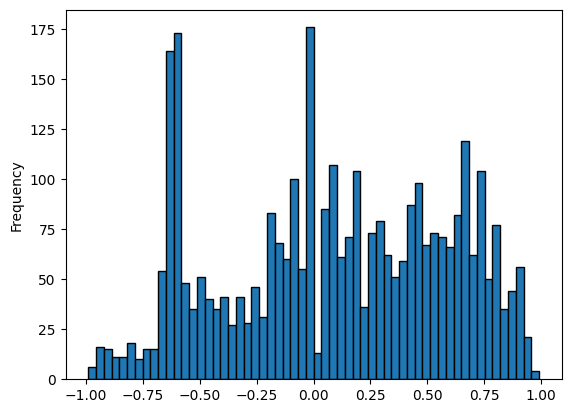

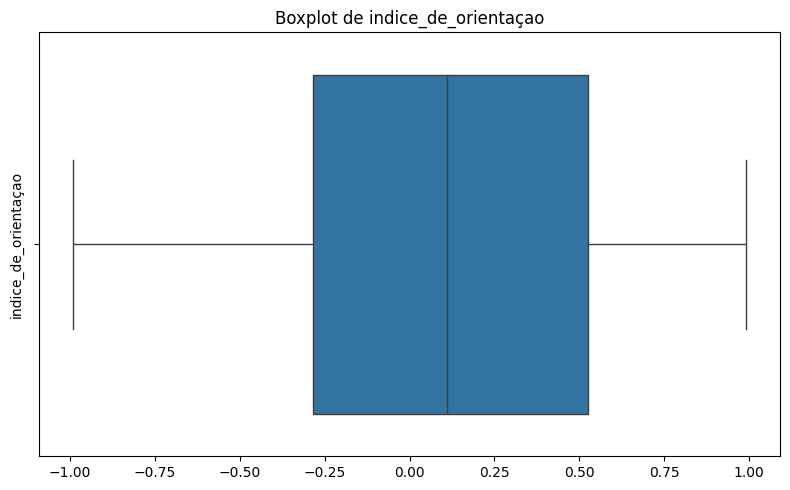

In [130]:
dados_def['indice_de_orientaçao'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'indice_de_orientaçao')

In [131]:
# Os dados também parecem bem distribuídos.
# A próxima variável:
# sigmoide_das_areas [Transformação sigmoide da área do defeito ou característica.]:

dados_def['sigmoide_das_areas'].describe()

count    3390.000000
mean        0.570363
std         0.335394
min         0.119000
25%         0.248200
50%         0.472100
75%         0.999300
max         1.000000
Name: sigmoide_das_areas, dtype: float64

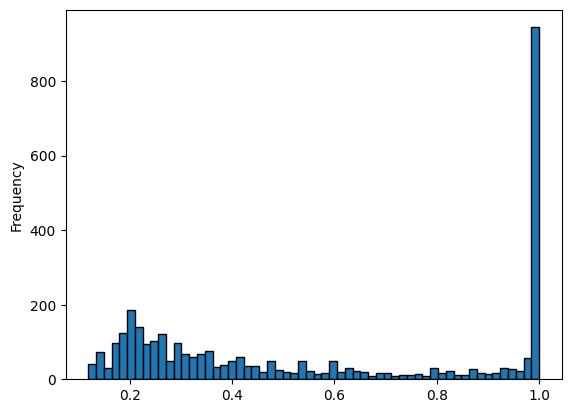

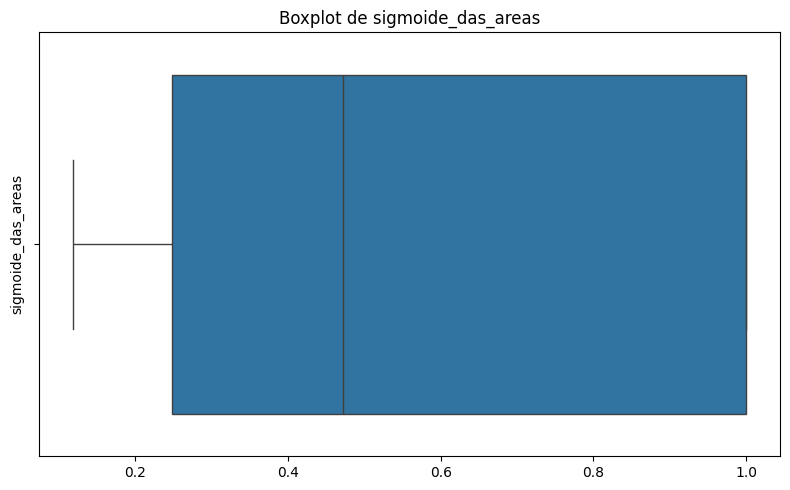

In [132]:
dados_def['sigmoide_das_areas'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'sigmoide_das_areas')

In [133]:
# Os dados também parecem bem distribuídos.
# A última variável:
# minimo_da_luminosidade [O menor valor de luminosidade dentro da região do defeito ou característica.]:

dados_def['minimo_da_luminosidade'].describe()

count    3390.000000
mean      171.763422
std       272.952080
min         0.000000
25%        71.000000
50%        93.000000
75%       111.000000
max      2086.000000
Name: minimo_da_luminosidade, dtype: float64

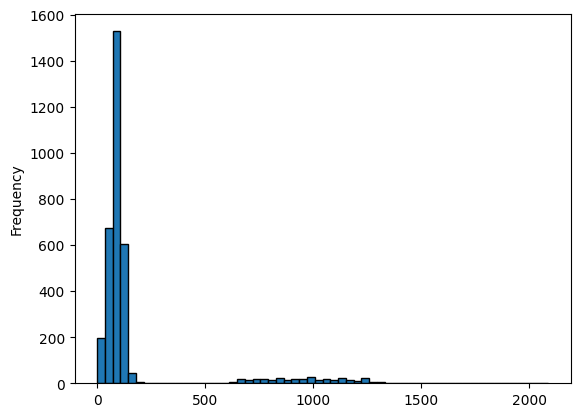

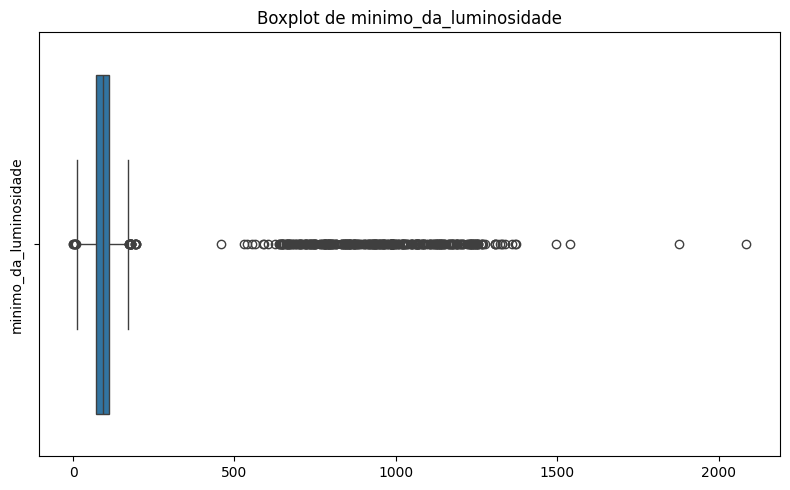

In [134]:
dados_def['minimo_da_luminosidade'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'minimo_da_luminosidade')

In [135]:
# Notam-se alguns outliers, mas não valores negativos:
# Removendo eventuais outliers e substituindo pela média:

Q1_mlum = dados_def['minimo_da_luminosidade'].quantile(0.25)
Q3_mlum = dados_def['minimo_da_luminosidade'].quantile(0.75)
IQR_mlum = Q3_mlum - Q1_mlum
limite_inferior_mlum = Q1_mlum - 1.5 * IQR_mlum
limite_superior_mlum = Q3_mlum + 1.5 * IQR_mlum

dados_def['minimo_da_luminosidade'] = dados_def['minimo_da_luminosidade'].apply(lambda x: np.nan if x <= limite_inferior_mlum or x >= limite_superior_mlum else x)
dados_def['minimo_da_luminosidade'].fillna(dados_def['minimo_da_luminosidade'].mean(), inplace=True)

<ipython-input-135-99802960c2ae>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_def['minimo_da_luminosidade'].fillna(dados_def['minimo_da_luminosidade'].mean(), inplace=True)


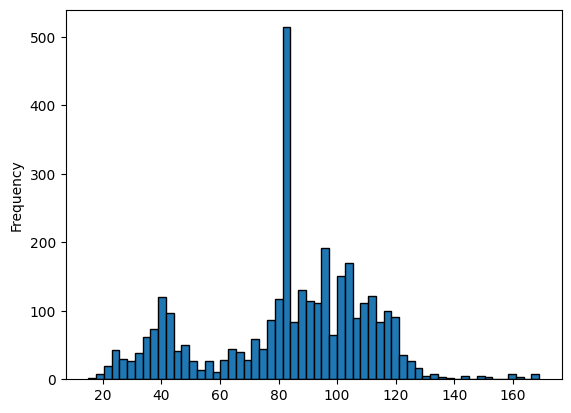

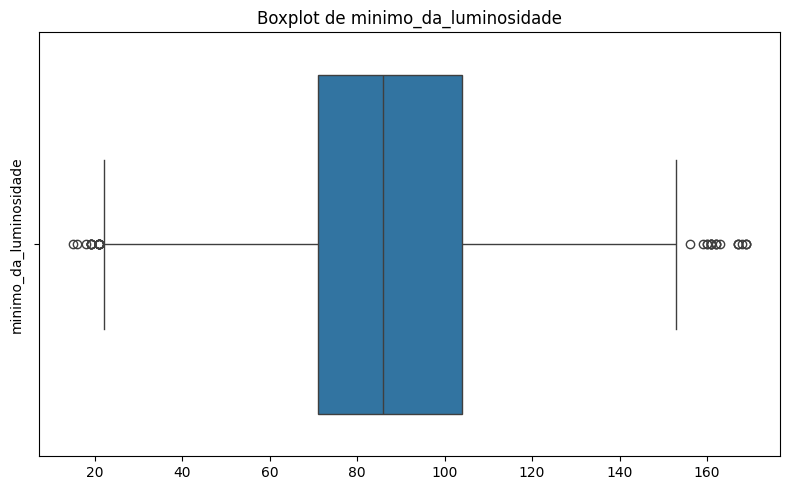

In [136]:
dados_def['minimo_da_luminosidade'].plot(kind='hist', bins=bins, edgecolor='black')
plot_boxplots(dados_def, 'minimo_da_luminosidade')

In [137]:
# Retornando uma visão geral:

dados_def.describe()

id     x_minimo     x_maximo     y_minimo     y_maximo  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean   1694.500000   615.920125   643.055489  1366.180952  1302.901035   
std     978.753033   555.033220   499.772678  1204.021124  1129.920787   
min       0.000000     0.000000     4.000000     0.020000     0.166000   
25%     847.250000    41.000000   186.000000   393.435250   340.738000   
50%    1694.500000   614.000000   563.000000  1265.462500  1128.297000   
75%    2541.750000  1085.000000  1088.000000  1891.072500  1940.424750   
max    3389.000000  2874.000000  1713.000000  5797.143000  4848.269000   

       area_pixels  perimetro_x  perimetro_y  comprimento_do_transportador  \
count  3390.000000  3390.000000  3390.000000                   3390.000000   
mean    198.383916    78.578110    59.324773                   1460.635202   
std     170.090287    92.757428    63.228112                    138.144729   
min       2.000000     2.000000     2.000000                   1227.000000   
25%      99.000000    15.000000    14.000000                   1358.000000   
50%     196.000000    28.000000    28.000000                   1372.000000   
75%     206.000000    91.000000    87.000000                   1634.000000   
max    1148.000000   481.000000   294.000000                   1794.000000   

       espessura_da_chapa_de_aço  temperatura  index_de_bordas  index_vazio  \
count                3390.000000  3390.000000      3390.000000  3390.000000   
mean                   74.810673    79.914485         0.340712     0.406904   
std                    38.518726     9.723738         0.307037     0.127074   
min                    40.000000    53.298314         0.000000     0.068200   
25%                    40.000000    73.206751         0.060400     0.314900   
50%                    70.000000    79.853362         0.232400     0.408250   
75%                    80.000000    86.503792         0.621650     0.494600   
max                   185.000000   106.646737         0.995200     0.761200   

       index_quadrado  log_das_areas  log_indice_x  log_indice_y  \
count     3390.000000    3390.000000   3390.000000   3390.000000   
mean         0.572069       2.446139      1.191647      1.395298   
std          0.262368       0.734465      0.328512      0.429142   
min          0.008300       0.778200      0.301000      0.000000   
25%          0.371400       1.930675      1.000000      1.079200   
50%          0.555600       2.225300      1.146100      1.322200   
75%          0.818200       2.756600      1.278700      1.724300   
max          1.000000       4.177500      2.190300      4.258700   

       indice_de_orientaçao  sigmoide_das_areas  minimo_da_luminosidade  
count           3390.000000         3390.000000             3390.000000  
mean               0.099153            0.570363               83.867725  
std                0.492312            0.335394               27.429338  
min               -0.991000            0.119000               15.000000  
25%               -0.285700            0.248200               71.000000  
50%                0.111100            0.472100               86.000000  
75%                0.526300            0.999300              104.000000  
max                0.991700            1.000000              169.000000

In [138]:
dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   float64
 2   x_maximo                      3390 non-null   float64
 3   y_minimo                      3390 non-null   float64
 4   y_maximo                      3390 non-null   float64
 5   area_pixels                   3390 non-null   float64
 6   perimetro_x                   3390 non-null   float64
 7   perimetro_y                   3390 non-null   float64
 8   comprimento_do_transportador  3390 non-null   float64
 9   tipo_do_aço_A300              3390 non-null   bool   
 10  espessura_da_chapa_de_aço     3390 non-null   float64
 11  temperatura                   3390 non-null   float64
 12  index_de_bordas               3390 non-null   float64
 13  ind

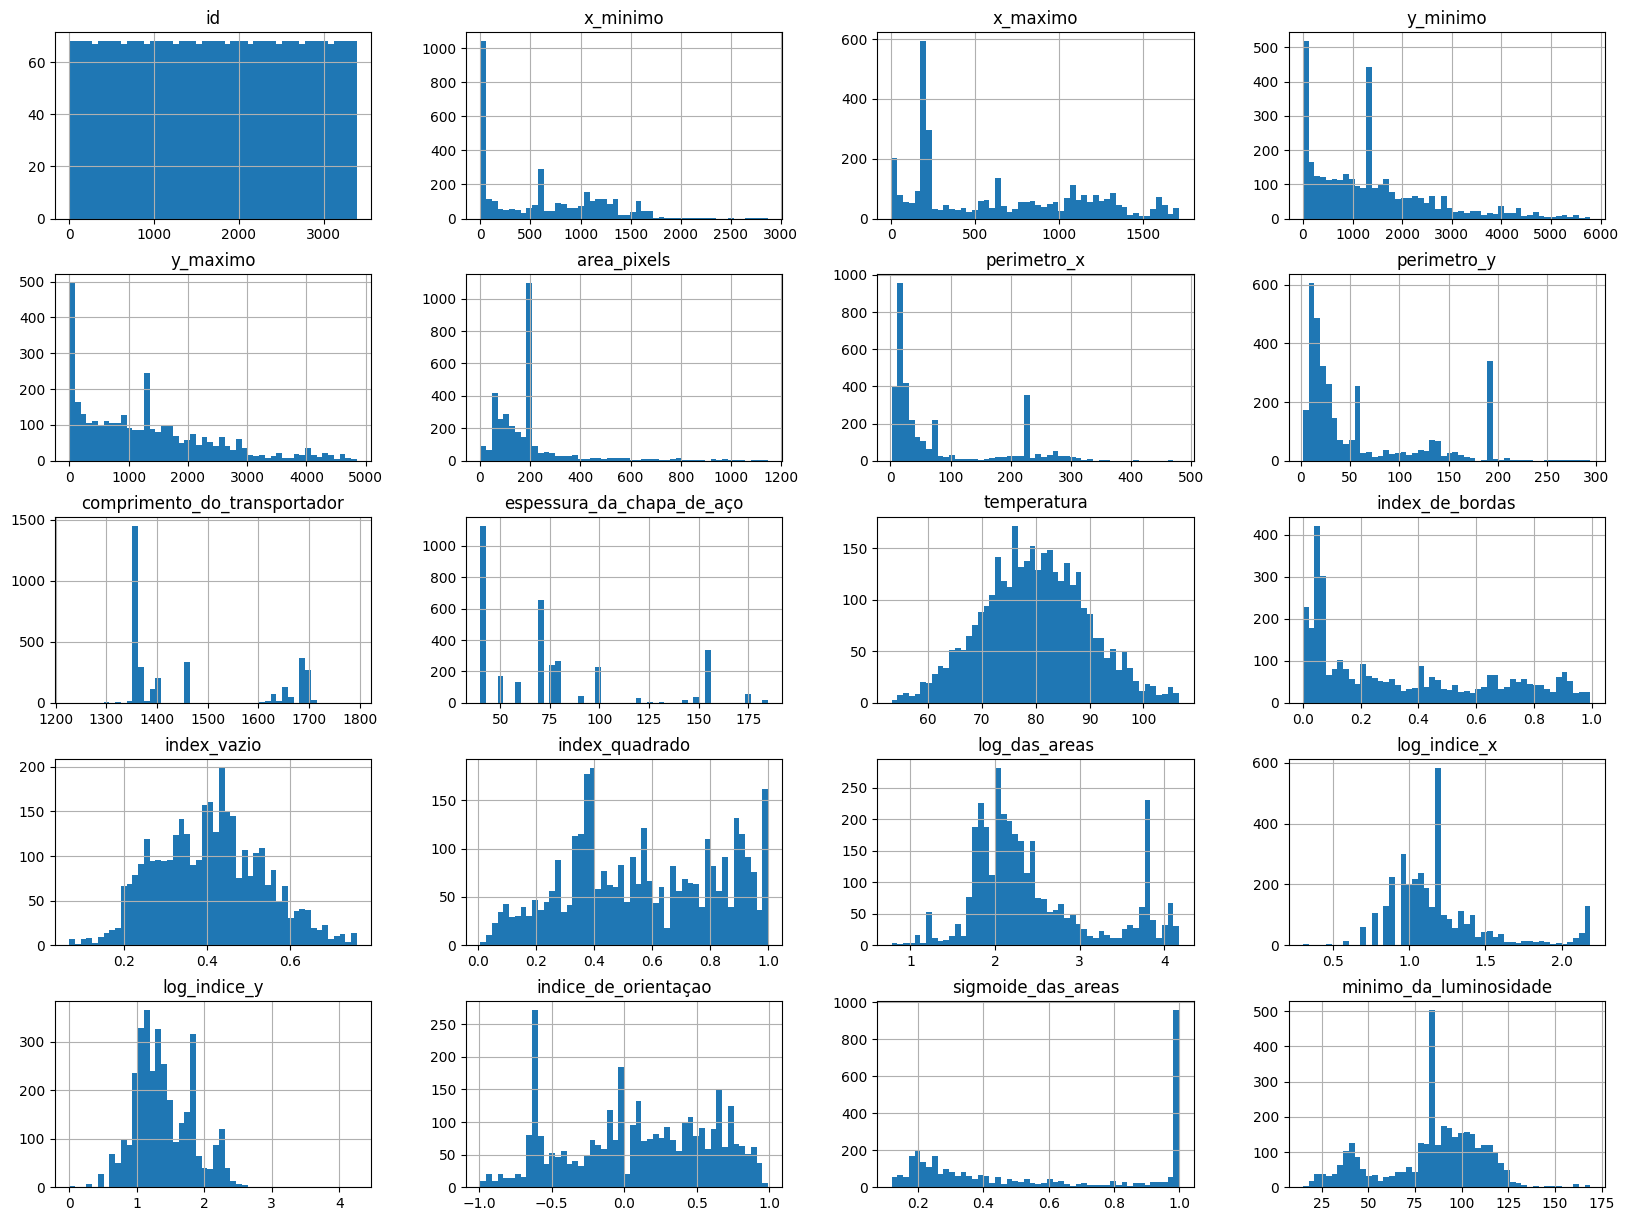

In [139]:
dados_def.hist(bins=50, figsize=(20,15))

plt.show()

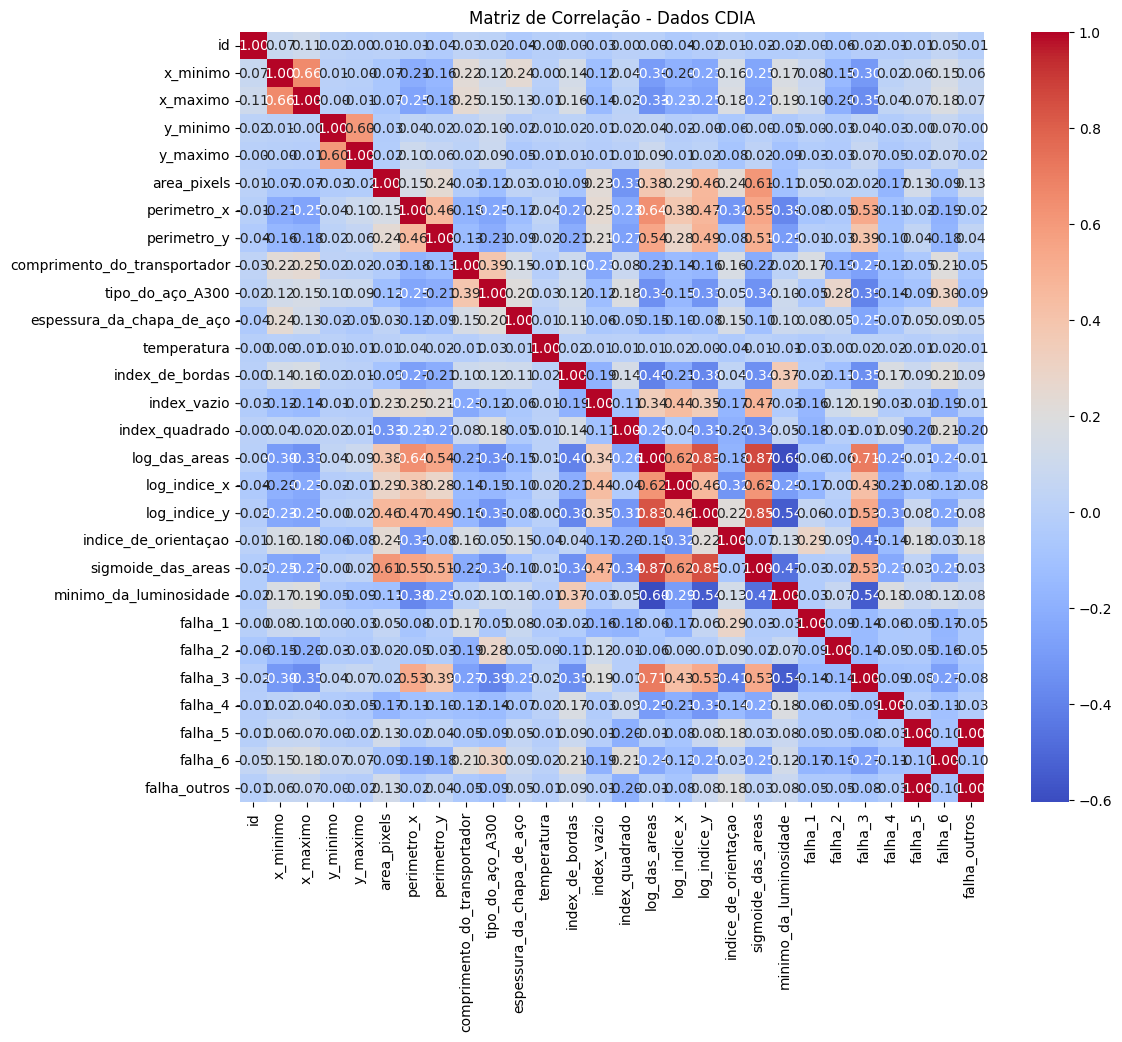

In [140]:
correlacao = dados_def.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Dados CDIA")
plt.show()

In [141]:
bins = int(np.sqrt(len(dados_def)))

In [142]:
def plot_histograms(dados_def, column, category_col, bins):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dados_def, x=column, hue=category_col, kde=True, bins=bins, palette='tab10', element='step')
    plt.title(f'Histograma de {column} por {category_col}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

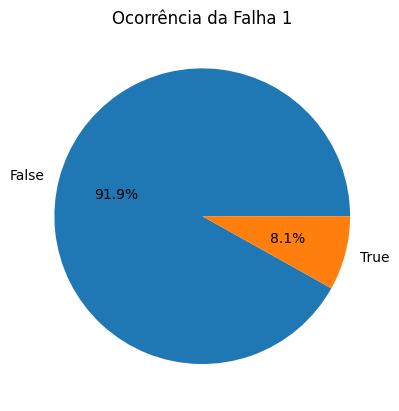

In [143]:
contagem = dados_def['falha_1'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

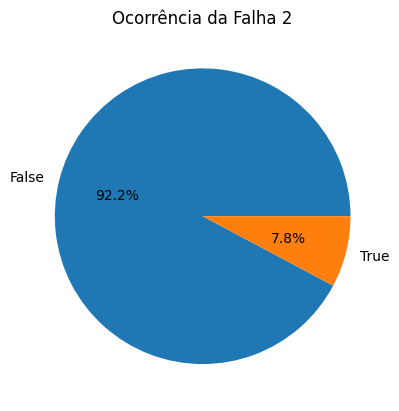

In [144]:
contagem = dados_def['falha_2'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 2')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

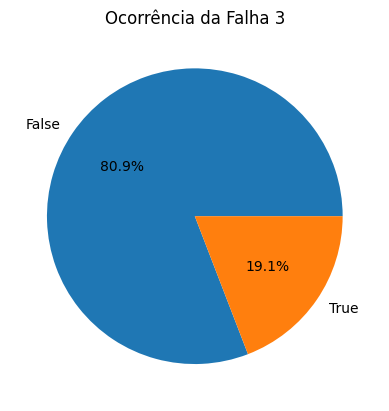

In [145]:
contagem = dados_def['falha_3'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 3')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

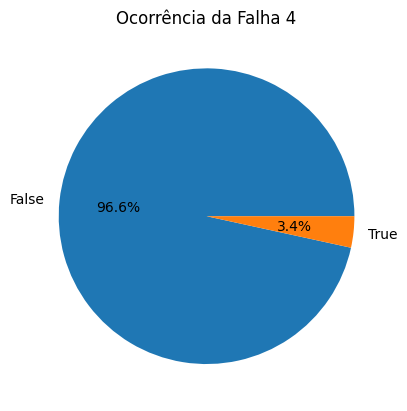

In [146]:
contagem = dados_def['falha_4'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 4')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

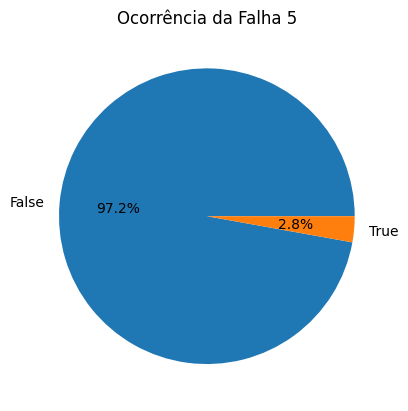

In [147]:
contagem = dados_def['falha_5'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 5')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

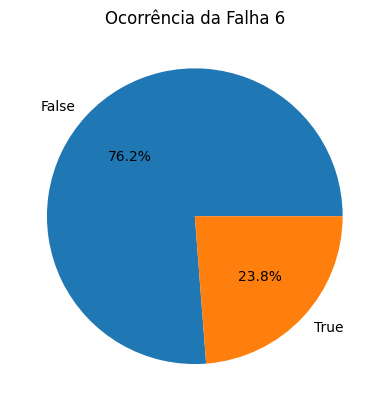

In [148]:
contagem = dados_def['falha_6'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência da Falha 6')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

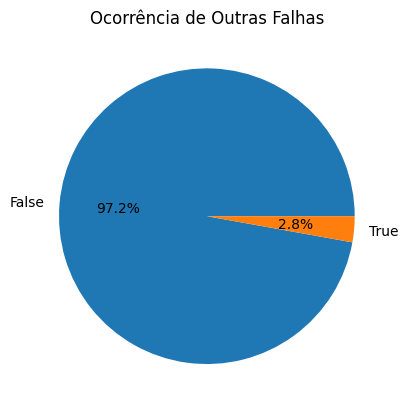

In [149]:
contagem = dados_def['falha_outros'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Ocorrência de Outras Falhas')
plt.show

In [ ]:
sns.pairplot(dados_def, hue='falha_1')
plt.show()

In [648]:
dados_def.to_csv('/content/drive/MyDrive/bootcamp_train_clean.csv', index=False)

In [656]:
dados_def.to_excel('/content/drive/MyDrive/bootcamp_train_clean.xlsx', index=False)

np.float64(0.08340170424210636)

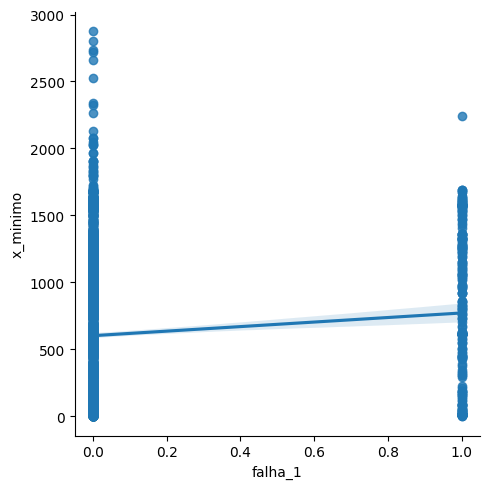

In [682]:
sns.lmplot(x='falha_1', y='x_minimo', data=dados_def)

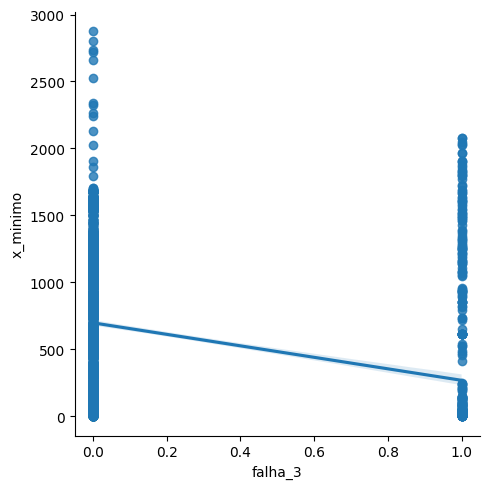

In [683]:
sns.lmplot(x='falha_3', y='x_minimo', data=dados_def)

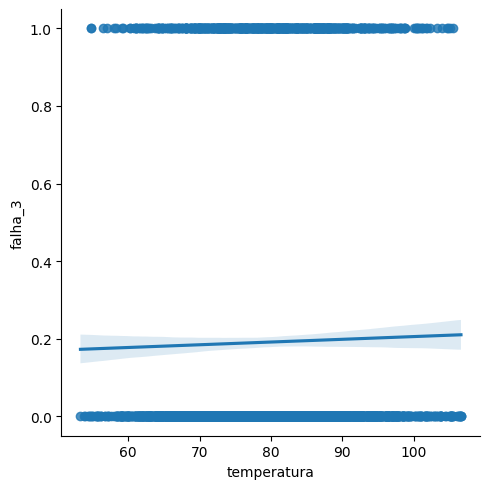

In [685]:
sns.lmplot(x='temperatura', y='falha_3', data=dados_def)

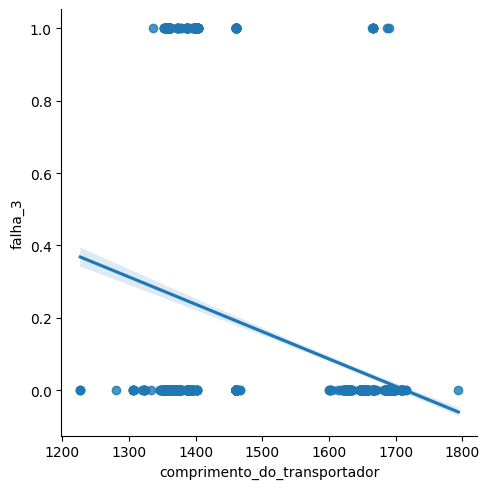

In [686]:
sns.lmplot(x='comprimento_do_transportador', y='falha_3', data=dados_def)

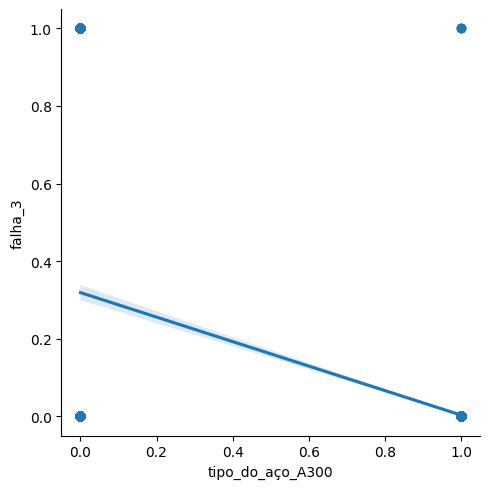

In [687]:
sns.lmplot(x='tipo_do_aço_A300', y='falha_3', data=dados_def)

<function matplotlib.pyplot.show(close=None, block=None)>

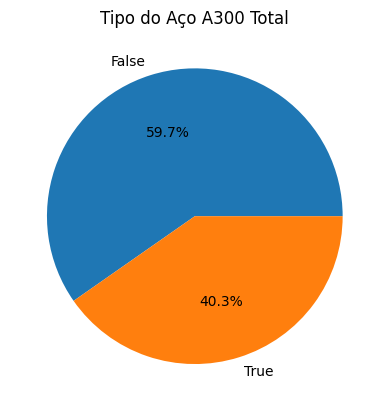

In [690]:
contagem = dados_def['tipo_do_aço_A300'].value_counts()
plt.pie(contagem, labels=contagem.index, autopct = '%1.1f%%')
plt.title('Tipo do Aço A300 Total')
plt.show

In [691]:
dados_def[["tipo_do_aço_A300", "falha_3"]].corr()

tipo_do_aço_A300   falha_3
tipo_do_aço_A300          1.000000 -0.393635
falha_3                  -0.393635  1.000000

In [664]:
dados_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   float64
 2   x_maximo                      3390 non-null   float64
 3   y_minimo                      3390 non-null   float64
 4   y_maximo                      3390 non-null   float64
 5   area_pixels                   3390 non-null   float64
 6   perimetro_x                   3390 non-null   float64
 7   perimetro_y                   3390 non-null   float64
 8   comprimento_do_transportador  3390 non-null   float64
 9   tipo_do_aço_A300              3390 non-null   bool   
 10  espessura_da_chapa_de_aço     3390 non-null   float64
 11  temperatura                   3390 non-null   float64
 12  index_de_bordas               3390 non-null   float64
 13  ind

In [1]:
def plot_boxplots_category(dados_def, column, category_col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dados_def, x=category_col, y=column, hue=category_col, palette='tab10')
    plt.title(f'Boxplot de {column} por {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

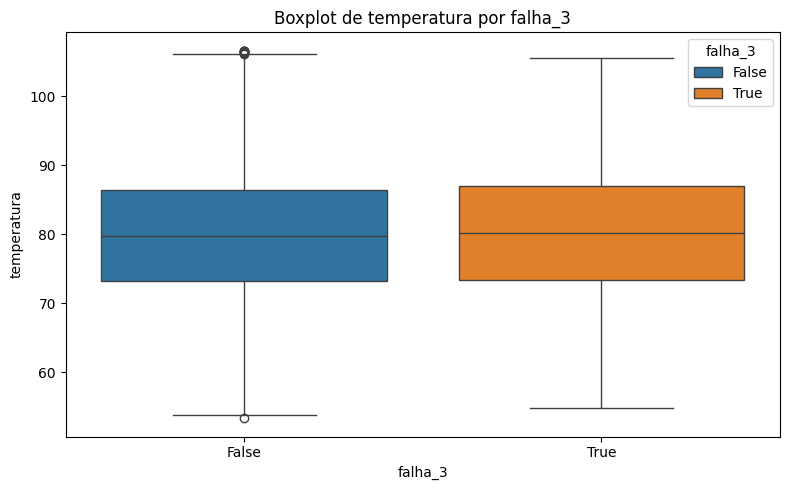

In [151]:
plot_boxplots_category(dados_def, 'temperatura', 'falha_3')

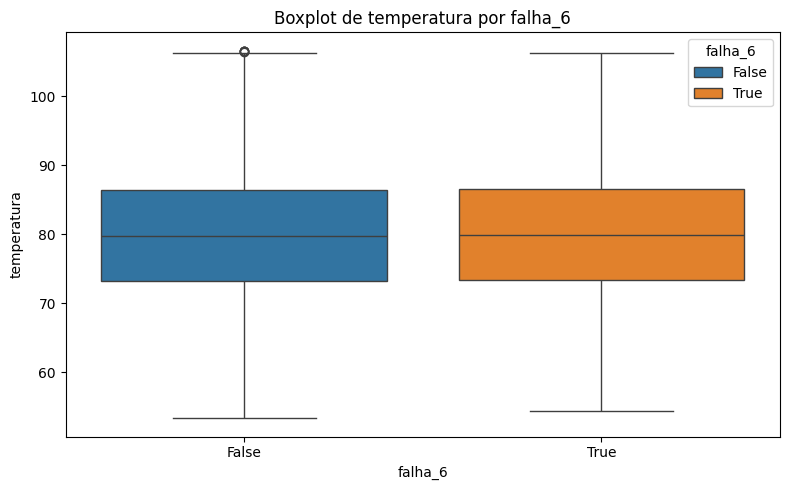

In [152]:
plot_boxplots_category(dados_def, 'temperatura', 'falha_6')

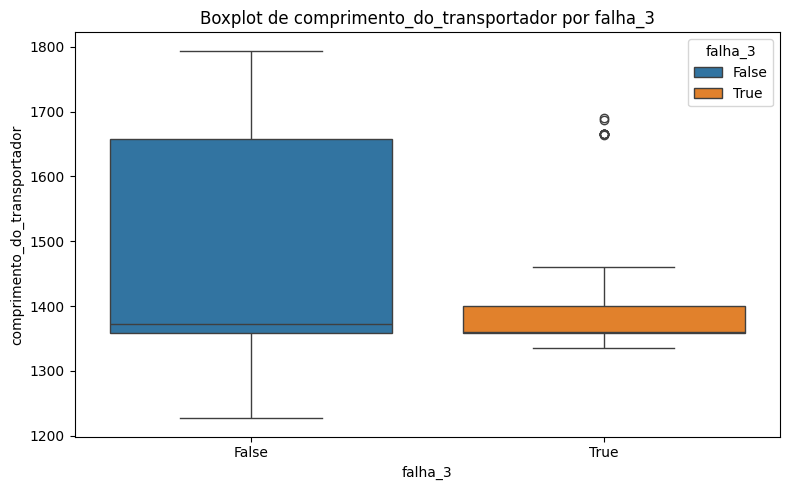

In [153]:
plot_boxplots_category(dados_def, 'comprimento_do_transportador', 'falha_3')

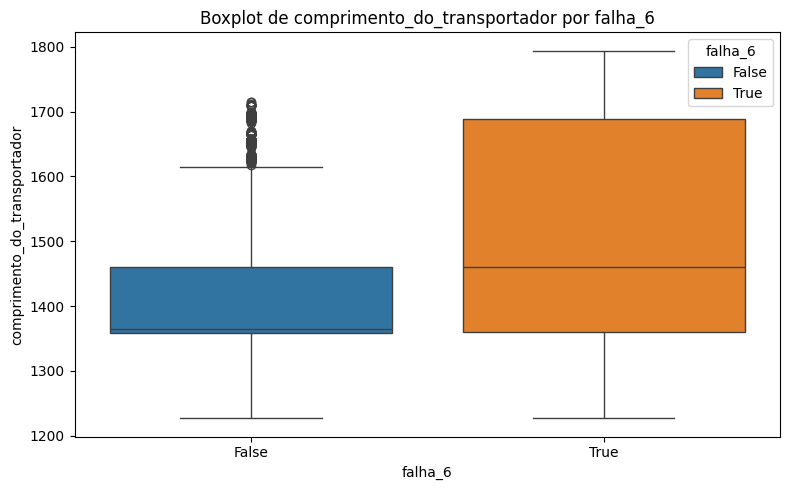

In [154]:
plot_boxplots_category(dados_def, 'comprimento_do_transportador', 'falha_6')

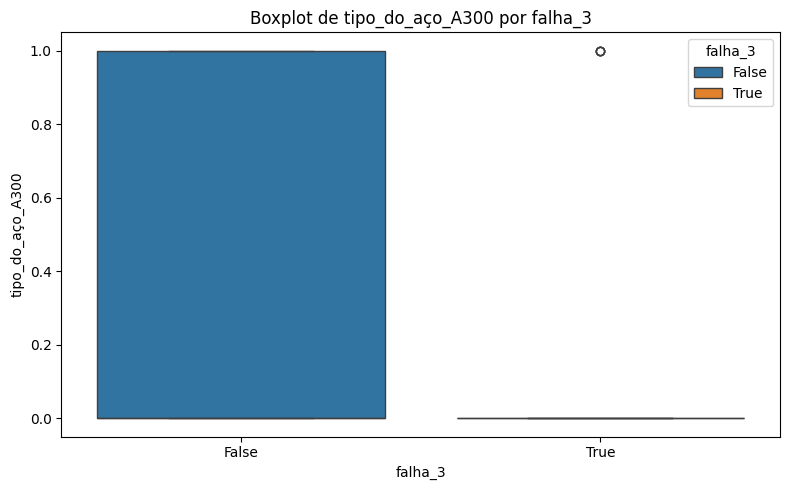

In [156]:
plot_boxplots_category(dados_def, 'tipo_do_aço_A300', 'falha_3')

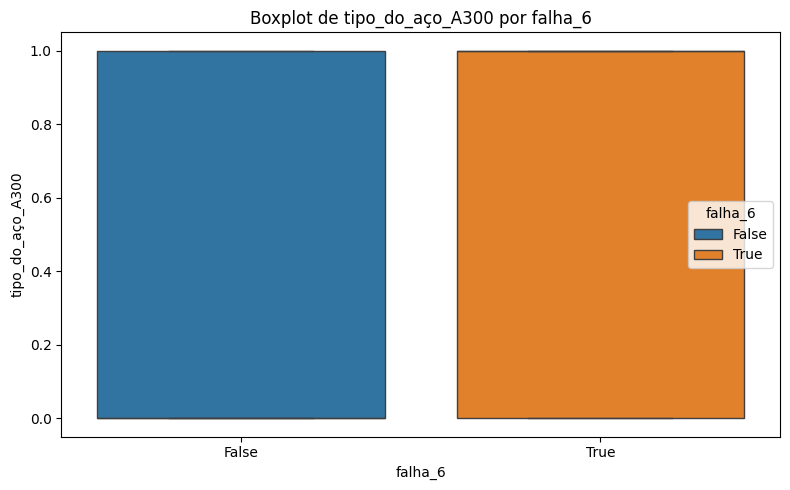

In [157]:
plot_boxplots_category(dados_def, 'tipo_do_aço_A300', 'falha_6')

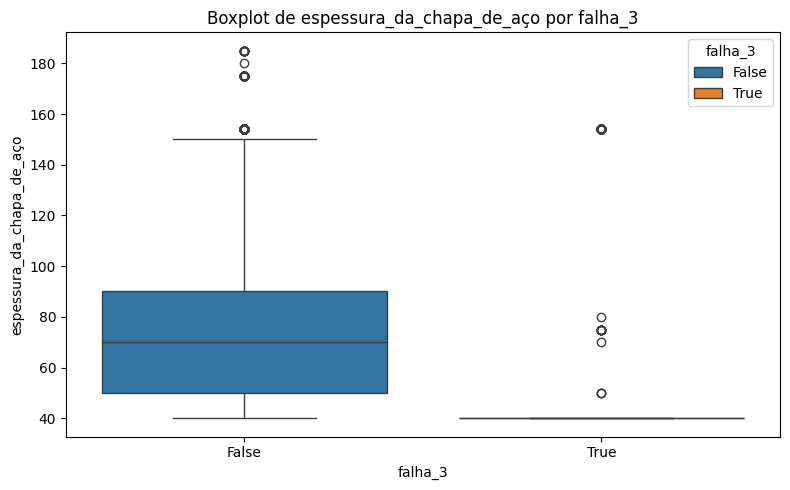

In [158]:
plot_boxplots_category(dados_def, 'espessura_da_chapa_de_aço', 'falha_3')

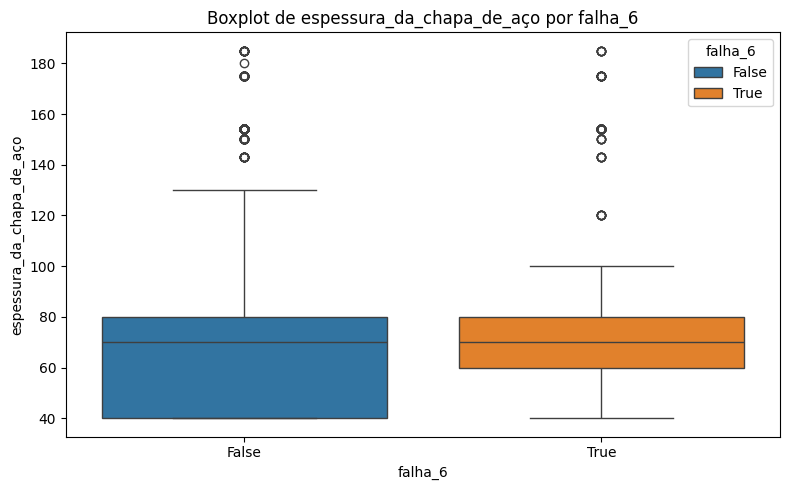

In [159]:
plot_boxplots_category(dados_def, 'espessura_da_chapa_de_aço', 'falha_6')

In [160]:
def plot_stacked_barplot(df, column, category_col=None, custom_labels=None):
    df_plot = df.copy()

    if custom_labels and column in custom_labels:
        label_list = custom_labels[column]
        unique_values = sorted(df_plot[column].dropna().unique())
        label_map = {val: label_list[i] for i, val in enumerate(unique_values) if i < len(label_list)}
        df_plot[column] = df_plot[column].map(label_map)

    if category_col and custom_labels and category_col in custom_labels:
        label_list = custom_labels[category_col]
        unique_values = sorted(df_plot[category_col].dropna().unique())
        label_map = {val: label_list[i] for i, val in enumerate(unique_values) if i < len(label_list)}
        df_plot[category_col] = df_plot[category_col].map(label_map)

    count_data = pd.crosstab(df_plot[column], df_plot[category_col])

    count_data.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab10')

    plt.title(f'Barras Empilhadas de {column}' + (f' por {category_col}' if category_col else ''))
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

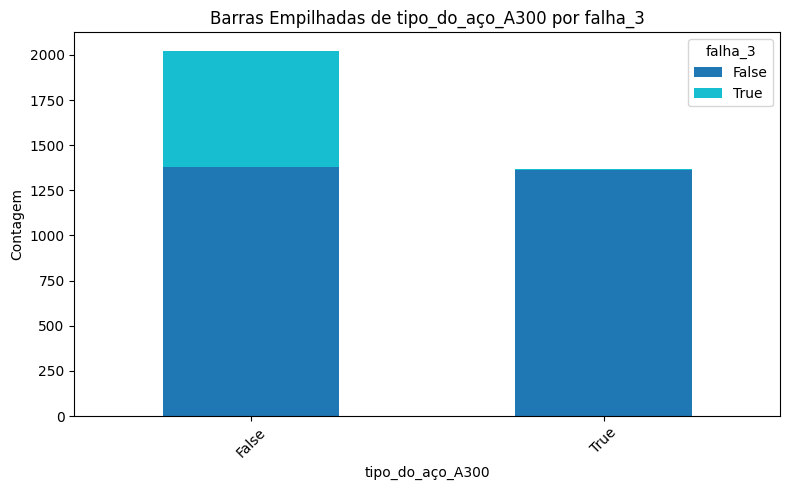

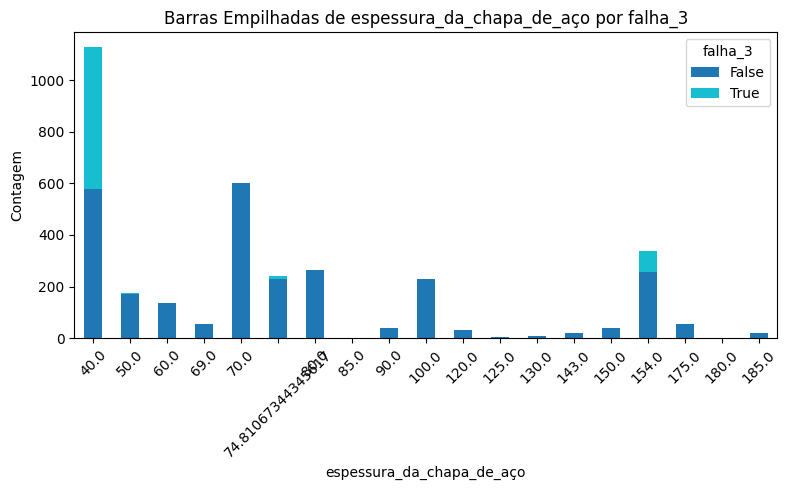

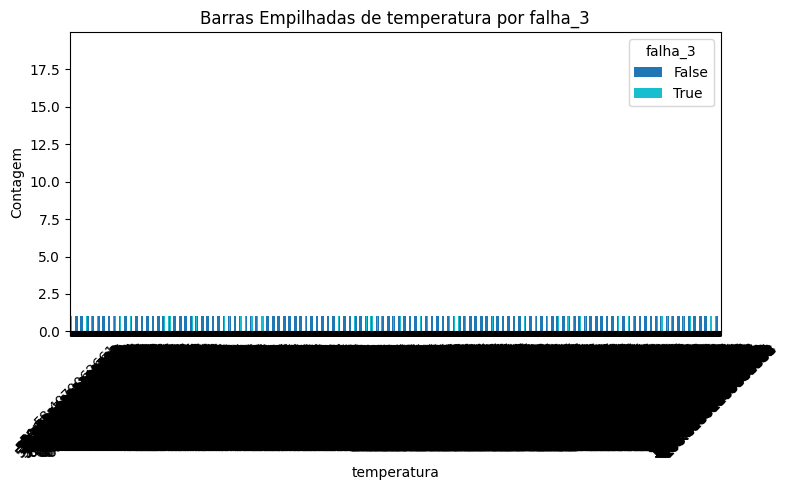

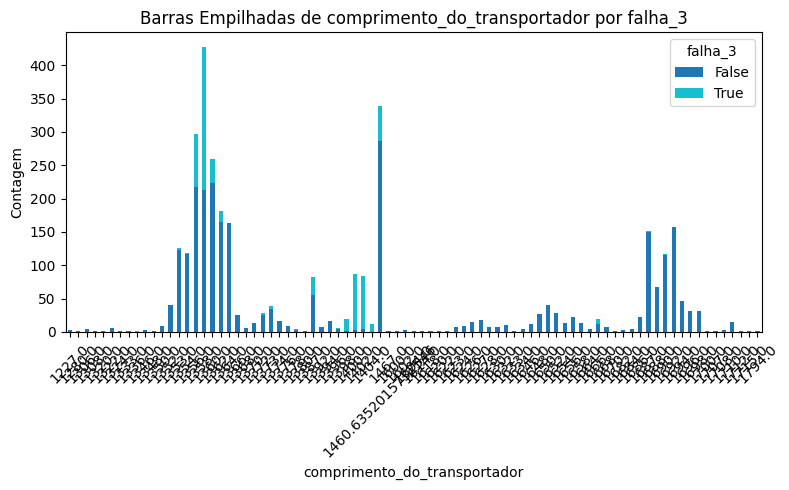

In [164]:
categorical = ['tipo_do_aço_A300', 'espessura_da_chapa_de_aço', 'temperatura','comprimento_do_transportador'] # Add other categorical columns as needed
custom_labels = {}
for column in categorical:
    plot_stacked_barplot(dados_def, column, 'falha_3', custom_labels)

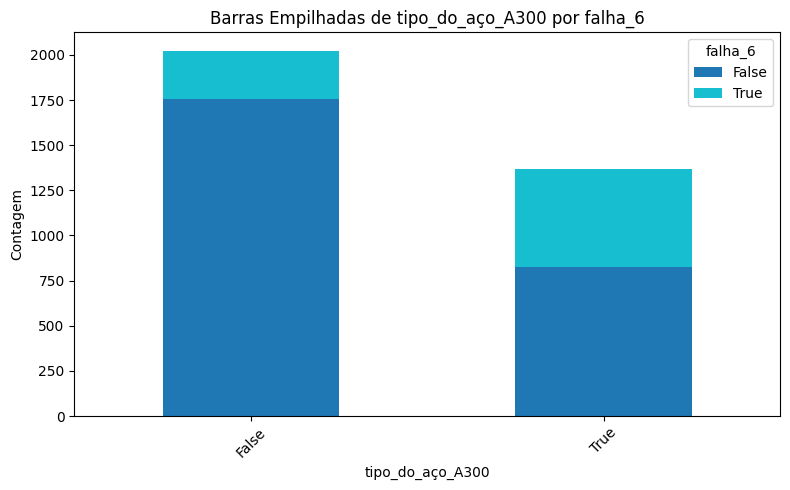

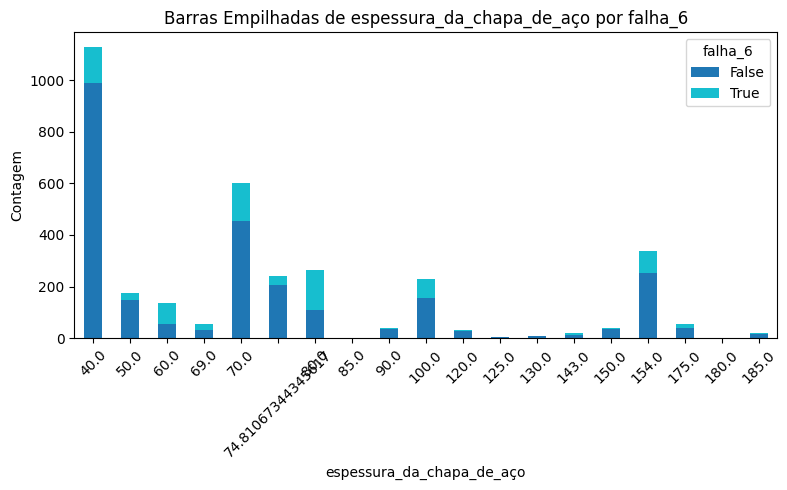

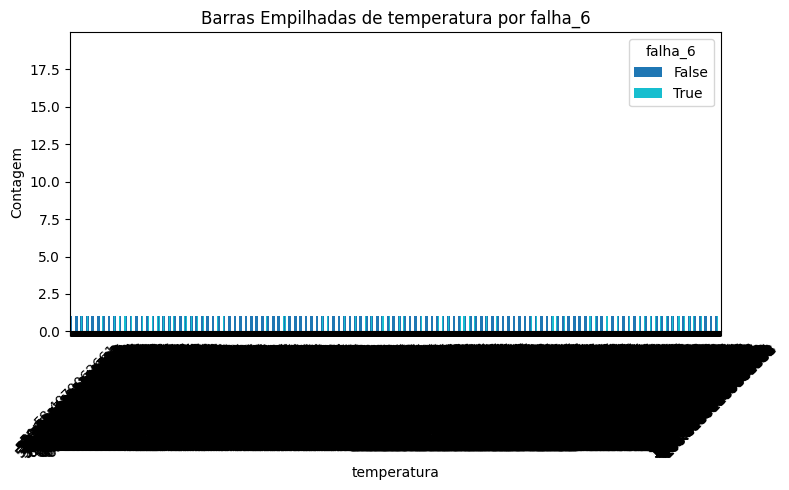

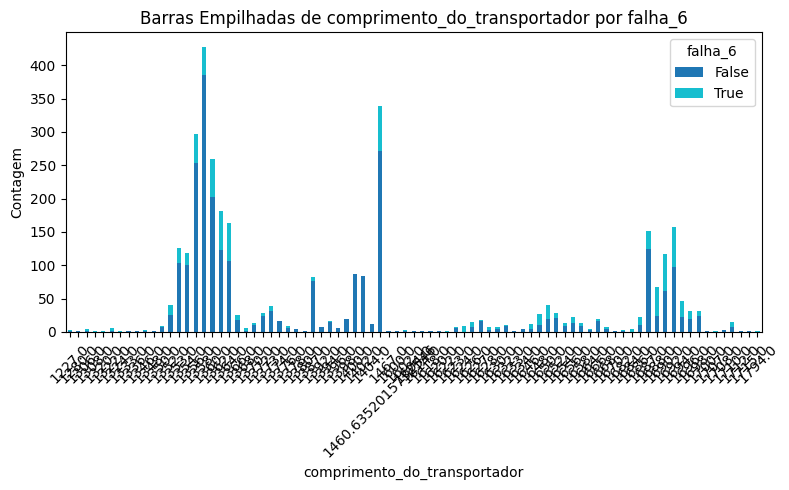

In [165]:
categorical = ['tipo_do_aço_A300', 'espessura_da_chapa_de_aço', 'temperatura','comprimento_do_transportador'] # Add other categorical columns as needed
custom_labels = {}
for column in categorical:
    plot_stacked_barplot(dados_def, column, 'falha_6', custom_labels)